Charlotte Kruzic & Zo√© Marquis  
UE Entreposage et protection des donn√©es

# Projet naiades

Ce projet vise √† explorer la relation entre les caract√©ristiques physico-chimiques de l'eau et son √©tat biologique √† travers l'analyse des donn√©es existantes. Nous abordons cette question en cherchant √† identifier les hydro√©cor√©gions √† partir des informations physicochimiques et hydrobiologiques des eaux de surface en France, et √† comprendre dans quelle mesure ces deux aspects de l'√©tat de l'eau sont corr√©l√©s.

Le sujet √©tant ouvert, nous avons donc d√ª d√©finir un cadre clair, et nous avons d√©cid√© de nous concentrer sur les deux objectifs principaux suivants :

1. Caract√©risation des hydro√©cor√©gions √† partir des donn√©es physicochimiques et hydrobiologiques : Nous cherchons √† d√©terminer si, √† partir des param√®tres physico-chimiques et hydrobiologiques mesur√©s dans les diverses stations, il est possible de retrouver les hydro√©cor√©gions.

2. Compr√©hension de la relation entre la physicochimie de l'eau et son √©tat biologique : Nous nous int√©resserons √† l'√©tablissement de corr√©lations entre les param√®tres physico-chimiques et l'√©tat biologique de l'eau notamment √† travers l'indice I2M2. L'objectif est d'identifier les param√®tres ayant le plus d'influence sur la qualit√© √©cologique de l'eau. (TODO : dire si on l'a fait finalement)

Pour atteindre ces objectifs, nous avons commenc√© par une analyse approfondie des donn√©es physico-chimiques et hydrobiologiques recueillies au niveau des diff√©rentes stations. Ces donn√©es ont √©t√© pr√©par√©es, nettoy√©es et agr√©g√©es par saison, pour permettre une analyse plus pertinente des ph√©nom√®nes √©cologiques. Nous avons √©galement √©tudi√© la possibilit√© d'int√©grer un d√©calage temporel entre la mesure des param√®tres physicochimiques et l'√©tat biologique, afin de prendre en compte le temps de r√©ponse de l'√©cosyst√®me.

In [1]:
# TODO (done) ZOE CHARLOTTE  :
"""
Quel lien peut-on √©tablir entre la physico-chimie de l‚Äôeau et son √©tat biologique ?

Le probl√®me pos√©. Le sujet est volontairement ouvert, il est n√©cessaire de bien cadrer la question
que l‚Äôon se pose, d‚Äôidentifier les limites impos√©es et celles que vous d√©cidez d‚Äôajouter.

- reprendre dans le sujet les diff√©rentes contraintes
- puis formuler notre probl√©matique 

une liste en dessous : 

- Comment l'√©volution temporelle d'un param√®tre physico-chimique sp√©cifique (par exemple, les nitrates) affecte-t-elle l'√©tat biologique de l'eau, et peut-on caract√©riser cette relation √† l'aide de techniques de clustering?
- Un mod√®le de r√©gression peut-il pr√©dire avec pr√©cision l'indice biologique (I2M2) √† partir des param√®tres physico-chimiques, et si oui, quelles sont les implications pour la gestion et la surveillance de l'eau?
- Comment les variations spatiales des param√®tres physico-chimiques et des indices biologiques diff√®rent-elles entre les hydro√©cor√©gions de France, et quelles informations peut-on tirer de la comparaison de ces mod√®les avec les donn√©es g√©ographiques?
- Comment les √©v√©nements exceptionnels et les cycles saisonniers influencent-ils la relation entre les param√®tres physico-chimiques et les indices biologiques, et quelles strat√©gies peuvent √™tre employ√©es pour prendre en compte ces facteurs dans les efforts de gestion et de surveillance de l'eau?

- pn pourra revoir toute la d√©marche pour chercher une probl√©matique assez cibl√© sur ce qu'on a fait
"""

"\nQuel lien peut-on √©tablir entre la physico-chimie de l‚Äôeau et son √©tat biologique ?\n\nLe probl√®me pos√©. Le sujet est volontairement ouvert, il est n√©cessaire de bien cadrer la question\nque l‚Äôon se pose, d‚Äôidentifier les limites impos√©es et celles que vous d√©cidez d‚Äôajouter.\n\n- reprendre dans le sujet les diff√©rentes contraintes\n- puis formuler notre probl√©matique \n\nune liste en dessous : \n\n- Comment l'√©volution temporelle d'un param√®tre physico-chimique sp√©cifique (par exemple, les nitrates) affecte-t-elle l'√©tat biologique de l'eau, et peut-on caract√©riser cette relation √† l'aide de techniques de clustering?\n- Un mod√®le de r√©gression peut-il pr√©dire avec pr√©cision l'indice biologique (I2M2) √† partir des param√®tres physico-chimiques, et si oui, quelles sont les implications pour la gestion et la surveillance de l'eau?\n- Comment les variations spatiales des param√®tres physico-chimiques et des indices biologiques diff√®rent-elles entre les hydr

## Importation des biblioth√®ques

In [2]:
import numpy as np
import pandas as pd

import geopandas as gpd
import shapely.geometry as geom
from shapely import geometry as geom

from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns

from scipy.stats import zscore

import zstandard as zstd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Chargement des donn√©es

In [3]:
# stations
df_load_stations = pd.read_csv('data/stations_hb.csv.zst',sep=';',escapechar = '\\')
df_stations = df_load_stations.copy() # copy pour nettoyer etc mais garder l'original pour recuperer les infos

In [4]:
# pc : physicochimie
f="data/donnees_physicochimie.csv.zst"
pc_sample = pd.read_csv(f,nrows=1)
pc_list_cols = pc_sample.columns
pc_list_cat = pc_list_cols[pc_list_cols.str.startswith((
    'Lb','Nom','Mnemo',
    'Cd','Sym','Com'))]

pc_dict_cat = {col: 'category' for col in pc_list_cat}

df_load_pc = pd.read_csv(
        f,
        sep=',',
        engine='c',
        escapechar='\\',
        dtype=pc_dict_cat,
        parse_dates=[7],
        iterator=False)
df_pc = df_load_pc.copy()

In [5]:
# hydrobio
df_load_hydrobio = pd.read_csv('data/donnees_hydrobio.csv.zst',sep=',',escapechar = '\\')
df_hydrobio = df_load_hydrobio.copy()

In [6]:
# hydroecoregion
df_load_hydroregions = gpd.read_file("data/Hydroecoregion1-shp.zip")
df_hydroregions = df_load_hydroregions.copy()

## Analyse exploratoire

### Objectifs

L'objectif principal de cette analyse exploratoire est de comprendre le contenu de chaque jeu de donn√©es utilis√© dans le projet, d'identifier les colonnes pertinentes ainsi que celles qui peuvent √™tre supprim√©es, et de d√©terminer comment remodeler les donn√©es pour les rendre exploitables pour l'analyse.

### Description des jeux de donn√©es

Le projet repose sur plusieurs jeux de donn√©es, comprenant des mesures physico-chimiques, des informations hydrobiologiques, des donn√©es sur les stations de mesure, et des donn√©es g√©ographiques des hydro√©cor√©gions.

1. Les **donn√©es des stations de mesure** fournissent des informations n√©cessaires pour localiser chaque station de mesure (latitude et longitude), ainsi que des identifiants uniques permettant de relier les stations entre les diff√©rents jeux de donn√©es.

2. Les **donn√©es physico-chimiques** contiennent les mesures physico-chimiques des eaux (par exemple, nitrates, phosphates, pH...). Chaque mesure est associ√©e √† une station, √† une date, ainsi qu'√† un support et une fraction d'analyse sp√©cifique.

3. Les **donn√©es hydrobiologiques** comprennent l'indice √©cologique I2M2 √©valuant la qualit√© biologique des eaux. Ces indices sont li√©s aux stations et aux dates de pr√©l√®vement.

3. Les **donn√©es des hydro√©cor√©gions** sont des unit√©s spatiales d√©finies sur la base de crit√®res √©cologiques similaires, et permettent de classifier les diff√©rents milieux aquatiques √† travers la France.

In [7]:
#TODO (done) ZOE r√©diger : 
#Objectif : que contient chaque dataset, identifier les colonnes √† supprimer, comment remodeler les donn√©es...

### Exploration des donn√©es g√©ographiques

In [8]:
df_stations.head(3)

CdStationMesureEauxSurface       LbStationMesureEauxSurface  \
0                   01000477          LA SLACK √Ä RINXENT (62)   
1                   01000602  COLOGNE √† BUIRE COURCELLES (80)   
2                   01000605          L'OMIGNON √Ä DEVISE (80)   

   DurStationMesureEauxSurface  CoordXStationMesureEauxSurface  \
0                          NaN                       610228.78   
1                          NaN                       700318.40   
2                          NaN                       700279.85   

   CoordYStationMesureEauxSurface  CdProjStationMesureEauxSurface  \
0                      7078879.90                              26   
1                      6980033.60                              26   
2                      6973284.26                              26   

    LibelleProjection CodeCommune         LbCommune CodeDepartement  ...  \
0  RGF93 / Lambert 93       62711           RINXENT              62  ...   
1  RGF93 / Lambert 93       80150  BUIRE-COURCELLES              80  ...   
2  RGF93 / Lambert 93       80239            DEVISE              80  ...   

  DateMAJInfosStationMesureEauxSurface  FinaliteStationMesureEauxSurface  \
0                  2015-12-14 00:00:00                               NaN   
1                  2015-12-14 00:00:00                               NaN   
2                  2015-12-14 00:00:00                               NaN   

               LocPreciseStationMesureEauxSurface  \
0  Lieu-dit Ferme du Ch√¢teau. La Planche du Devin   
1                   MOULIN DE BINARD PONT D 194 E   
2                               ROUTE DE L'EGLISE   

  CodeNatureStationMesureEauxSurface LibelleNatureStationMesureEauxSurface  \
0                                  M            Station de mesure Manuelle   
1                                  M            Station de mesure Manuelle   
2                                  M            Station de mesure Manuelle   

  AltitudePointCaracteritisque PkPointTronconEntiteHydroPrincipale  \
0                          0.0                              980.48   
1                          0.0                              992.58   
2                          0.0                              993.69   

  PremierMoisAnneeEtiage SuperficieBassinVersantReel  \
0                    6.0                         NaN   
1                    6.0                         NaN   
2                    6.0                         NaN   

  SuperficieBassinVersantTopo  
0                         0.0  
1                         0.0  
2                         0.0  

[3 rows x 39 columns]

La table station est utile pour situer les stations ainsi que pour extraire l'identifiant pour joindre les tables sur les stations.

In [9]:
df_hydroregions.head(3)

gid  CdHER1     NomHER1                                           geometry
0    1      16       CORSE  POLYGON ((9.43319 43.00468, 9.4357 42.99999, 9...
1    2      12  ARMORICAIN  POLYGON ((-2.61068 48.55022, -2.61268 48.54898...
2    3      13      LANDES  MULTIPOLYGON (((-1.04228 45.54443, -1.03836 45...

In [10]:
# On v√©rifie qu'un code d'hydro√©cor√©gion (CdHER1) correspond bien √† un seul nom d'hydro√©cor√©gion (NomHER1)
print(df_hydroregions['CdHER1'].value_counts())

CdHER1
16    1
12    1
13    1
14    1
1     1
11    1
21    1
2     1
7     1
20    1
18    1
4     1
15    1
8     1
19    1
5     1
6     1
17    1
3     1
9     1
10    1
22    1
Name: count, dtype: int64


On a bien un CdHER1 pour un NomHER1, donc on va afficher la carte avec NomHER1 car cela est plus parlant pour l'utilisateur.

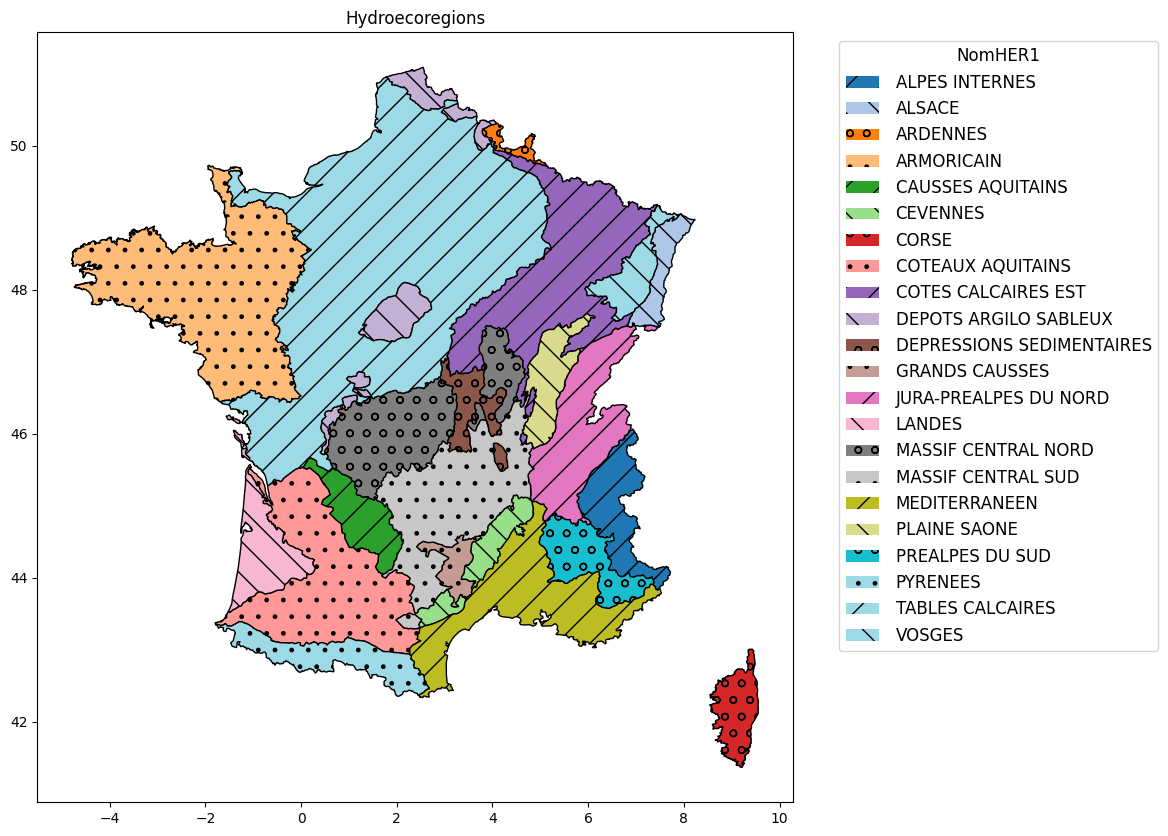

In [11]:
# Affichage des hydroeco regions
fig, ax = plt.subplots(figsize=(20, 10))

colors = plt.colormaps['tab20']
hatches = ['/', '\\', 'o', '.']
legend_elements = []

for i, (name, region) in enumerate(df_hydroregions.groupby('NomHER1')):
    patch = region.plot(ax=ax, color=colors(i), hatch=hatches[i % len(hatches)], edgecolor='black', label=name)
    legend_elements.append(Patch(facecolor=colors(i), hatch=hatches[i % len(hatches)], label=name))

ax.set_title('Hydroecoregions')
ax.legend(handles=legend_elements, title='NomHER1', bbox_to_anchor=(1.05, 1), loc='upper left',  fontsize='large', title_fontsize='large', handletextpad=1)

plt.show()

Nous allons maintenant situer les diff√©rentes stations sur la carte des hydro√©cor√©gions.

In [12]:
# TODO (done) CHARLOTTE OK : mettre la bonne forme de projection avec la bonne couleur pour les stations comme la cellule juste au dessus 

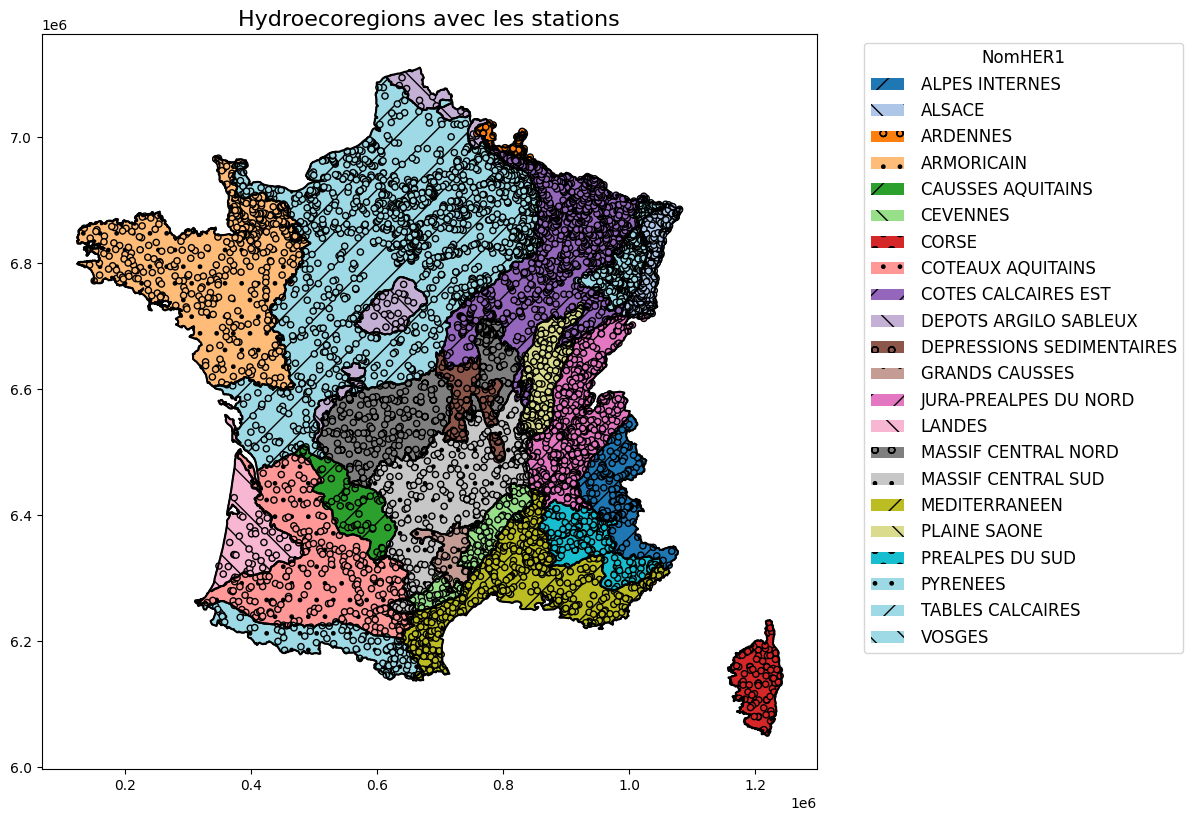

In [13]:
# Affichage des stations sur les hydroecoregions

crs_lambert = 'PROJCS["RGF_1993_Lambert_93",GEOGCS["GCS_RGF_1993",DATUM["D_RGF_1993",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic"],PARAMETER["False_Easting",700000.0],PARAMETER["False_Northing",6600000.0],PARAMETER["Central_Meridian",3.0],PARAMETER["Standard_Parallel_1",49.0],PARAMETER["Standard_Parallel_2",44.0],PARAMETER["Latitude_Of_Origin",46.5],UNIT["Meter",1.0]]'
x_col = 'CoordXStationMesureEauxSurface'
y_col = 'CoordYStationMesureEauxSurface'
carto_i2m2 = gpd.GeoDataFrame(df_stations,crs=crs_lambert, geometry = gpd.GeoSeries(df_stations.agg(lambda x:geom.Point(x.loc[x_col],x.loc[y_col])  ,axis=1)))

HER_stations=carto_i2m2.sjoin(df_hydroregions.to_crs(crs_lambert),predicate='within').to_crs(crs_lambert)

fig, ax = plt.subplots(1, 1, figsize=(10, 30))

colors = plt.colormaps['tab20']
hatches = ['/', '\\', 'o', '.']
legend_elements = []

color_mapping = {}
for i, (name, region) in enumerate(df_hydroregions.groupby('NomHER1')):
    region = region.to_crs(crs_lambert)
    patch = region.plot(ax=ax, color=colors(i), hatch=hatches[i % len(hatches)], edgecolor='black', label=name)
    legend_elements.append(Patch(facecolor=colors(i), hatch=hatches[i % len(hatches)], label=name))
    color_mapping[name] = colors(i)

station_colors = HER_stations['NomHER1'].map(color_mapping)
HER_stations.plot(ax=ax, color=station_colors, markersize=20, edgecolor='black')

HER_lambert = df_hydroregions.to_crs(crs_lambert)
HER_lambert.boundary.plot(ax=ax, color='black')

ax.legend(handles=legend_elements, title='NomHER1', bbox_to_anchor=(1.05, 1), loc='upper left',  fontsize='large', title_fontsize='large', handletextpad=1)
ax.set_title('Hydroecoregions avec les stations', fontsize=16)

plt.show()

Nous observons maintenant la r√©partition des stations dans les diff√©rentes hydro√©cor√©gions.

In [14]:
stations_par_hydroecoregion = HER_stations.groupby('NomHER1').size().reset_index(name='nombre_de_stations')
print(stations_par_hydroecoregion)

                      NomHER1  nombre_de_stations
0              ALPES INTERNES                 156
1                      ALSACE                 352
2                    ARDENNES                  63
3                  ARMORICAIN                 445
4           CAUSSES AQUITAINS                  47
5                    CEVENNES                 106
6                       CORSE                  63
7           COTEAUX AQUITAINS                 265
8         COTES CALCAIRES EST                1008
9       DEPOTS ARGILO SABLEUX                  47
10  DEPRESSIONS SEDIMENTAIRES                  63
11             GRANDS CAUSSES                  25
12      JURA-PREALPES DU NORD                 632
13                     LANDES                  38
14        MASSIF CENTRAL NORD                 221
15         MASSIF CENTRAL SUD                 264
16              MEDITERRANEEN                 574
17               PLAINE SAONE                 223
18            PREALPES DU SUD                 167


In [15]:
stations_par_hydroecoregion = stations_par_hydroecoregion.sort_values(by='nombre_de_stations', ascending=True)
fig = px.bar(stations_par_hydroecoregion,  x='NomHER1',  y='nombre_de_stations', title='Nombre de stations par hydro√©cor√©gion', labels={'NomHER1': 'Hydro√©cor√©gion', 'nombre_de_stations': 'Nombre de Stations'})
fig.update_layout(xaxis_tickangle=45, width=900, height=600, xaxis_title="Hydro√©cor√©gion", yaxis_title="Nombre de Stations", title_font_size=18, xaxis_title_font_size=14, yaxis_title_font_size=14)

fig.show()

Nous pouvons voir que la r√©partition des stations n'est pas uniforme, et que le nombre de stations par hydro√©cor√©gion peut varier de 25 √† 1360.

### Exploration des donn√©es physico-chimiques et hydrobiologiques

#### Physico-chimiques

In [16]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8917443 entries, 0 to 8917442
Data columns (total 49 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   CdStationMesureEauxSurface  category      
 1   LbStationMesureEauxSurface  category      
 2   CdSupport                   category      
 3   LbSupport                   category      
 4   CdFractionAnalysee          category      
 5   LbFractionAnalysee          category      
 6   CdPrelevement               category      
 7   DatePrel                    datetime64[ns]
 8   HeurePrel                   object        
 9   CdParametre                 category      
 10  LbLongParam√®tre             category      
 11  RsAna                       float64       
 12  CdUniteMesure               category      
 13  SymUniteMesure              category      
 14  CdRqAna                     category      
 15  MnemoRqAna                  category      
 16  CdInsituAna      

In [17]:
df_pc.shape

(8917443, 49)

#### Hydro-biologiques

In [ ]:
df_hydrobio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43535 entries, 0 to 43534
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          43535 non-null  int64  
 1   CdStationMesureEauxSurface          43535 non-null  int64  
 2   LbStationMesureEauxSurface          43535 non-null  object 
 3   CdPointEauxSurf                     43115 non-null  float64
 4   DateDebutOperationPrelBio           43535 non-null  object 
 5   CdSupport                           43535 non-null  int64  
 6   LbSupport                           43535 non-null  object 
 7   DtProdResultatBiologique            14829 non-null  object 
 8   CdParametreResultatBiologique       43535 non-null  int64  
 9   LbLongParametre                     43535 non-null  object 
 10  ResIndiceResultatBiologique         43522 non-null  float64
 11  CdUniteMesure                       43535

In [19]:
df_hydrobio.shape

(43535, 21)

## Pr√©paration des donn√©es physicochimiques

### D√©marche

Pour notre analyse des hydro√©cor√©gions, nous devons exploiter √† la fois les donn√©es temporelles et spatiales √† notre disposition. Notre principal objectif est d'utiliser les donn√©es temporelles et spatiales pour effectuer un clustering, afin de d√©terminer si nous pouvons retrouver les hydro√©cor√©gions existantes √† partir des caract√©ristiques physico-chimiques et biologiques disponibles.

Les donn√©es physicochimiques sont compos√©es d'environ de 9 millions de points de mesure, ce qui n√©cessite une r√©duction importante pour les rendre exploitables, compte tenu des limites de nos ressources informatiques. Nous avons proc√©d√© en 2 √©tape :

**Nettoyage des donn√©es** : La premi√®re √©tape a √©t√© le nettoyage des donn√©es. Les duplicatas et les valeurs aberrantes ont √©t√© supprim√©s. Cependant, compte tenu la quantit√© de donn√©es, nous ne pouvions pas visualiser l'int√©gralit√© ni effectuer des analyses sur chaque point individuellement. Nous avons donc mis en place des strat√©gies pour nettoyer les donn√©es sans pour autant perdre des informations significatives.

**Aggr√©gation des donn√©es** : Nous avons ensuite agr√©g√© les donn√©es par stations, par saison et par ann√©e, afin de r√©duire la variabilit√© et de faciliter l'analyse des tendances. Pour chaque param√®tre, nous avons calcul√© des statistiques r√©sum√©es telles que la m√©diane et la moyenne, dans le but de concerver un maximum d'information en r√©duisant la taille de notre jeu de donn√©es. Nous avons √©galement √©tudi√© les supports, les fractions, les unit√©s de mesures, et les param√®tres mesur√©s (TODO : Pas sure de √ßa) afin de filtrer et ne garder que les informations pertinentes pour l'√©tude. Et enfin, nous avons remodel√© les donn√©es afin d'obtenir une table avec pour chaque station, ann√©e et saison, des valeurs agr√©g√©es pour chaque param√®tre physicochimique.

In [20]:
# TODO (done) ZOE reformuler 
"""
on sait dans nos contraintes qu'on doit utiliser les donn√©es temporelles et spatiales

nous on aimerait utiliser les donn√©es temporelles et voir si on arrive √† faire un clustering pour retrouver les hydroecoregions

pour exploiter la relation entre physico chimie et hydrobiologique on se doute que pc a un impact sur hydrobio

on voit bien qu'on a presqeu 9 millions de donn√©es pc

on va donc devoir nettoyer beaucoup ces donn√©es pour r√©duire pn a pas des machines super puissante
supprimer duplicatas, les donn√©es aberrantes
ce qui va etre challengeant car il y a tellement de donn√©es qu'on ne peut pas non plus beaucoup plot, donc on va devoir mettre en place des sytrat√©gies pour supprimer sans perdre d'information

on va agr√©ger d√©j√† par saison par ann√©e les donn√©es par station

on va √©tudier quelles parametres / support / fraction / unit√© de mesure sont √©tudi√©s

on va pivoter pour enfaite obtenir une table qui 
par station, par saison par ann√©e, par param√®tre int√©ressant de pc : m√©diane / moyenne des donn√©es (agr√©ger suivant deux param√®tres)


CETTE PARTIE J'AI ECRIS PLUS BAS DANS LA PARTIE HYDROBIO (charlotte) :

puis on va ajouter les donn√©es hydrobio

pour cela il faut donc faire la meme pr√©paration
on pourrait utiliser lesvaleurs directement en agr√©geant de la meme maniere
ou aussi les classes de l'url fourni dans l'√©nonc√©

comme dit on pense que pc a un impact sur hydrobio
on va essayer diff√©rents laps de temps de d√©calage (1 mois, 3 mois, 6 mois) (√† voir quand on aura fini)
pour voir si √ßa changebeaucoup la performance

ensuite joindre √† notre table de pc plus legere agr√©g√© nettoy√© les donn√©es hydrobio
on ne garde que celle o√π c'est en commun avec station (on va utilser la table station pour join)

on fait un clustering sur le nombre de clusters de hydroecoregions (mais enfaite il faut qu'on v√©√©rifie une fois qu'on a join est ce qu'on a des donn√©es pour chaque hydroecoregions) si non on calcule quelle nombre on a ( on replot nos stations sur la map )
"""

"\non sait dans nos contraintes qu'on doit utiliser les donn√©es temporelles et spatiales\n\nnous on aimerait utiliser les donn√©es temporelles et voir si on arrive √† faire un clustering pour retrouver les hydroecoregions\n\npour exploiter la relation entre physico chimie et hydrobiologique on se doute que pc a un impact sur hydrobio\n\non voit bien qu'on a presqeu 9 millions de donn√©es pc\n\non va donc devoir nettoyer beaucoup ces donn√©es pour r√©duire pn a pas des machines super puissante\nsupprimer duplicatas, les donn√©es aberrantes\nce qui va etre challengeant car il y a tellement de donn√©es qu'on ne peut pas non plus beaucoup plot, donc on va devoir mettre en place des sytrat√©gies pour supprimer sans perdre d'information\n\non va agr√©ger d√©j√† par saison par ann√©e les donn√©es par station\n\non va √©tudier quelles parametres / support / fraction / unit√© de mesure sont √©tudi√©s\n\non va pivoter pour enfaite obtenir une table qui \npar station, par saison par ann√©e, par 

### Nettoyage des donn√©es

**Hypoth√®se :** Nous faisons l'hypoth√®se que certaines colonnes dans notre jeu de donn√©es, telles que le laboratoire, le producteur, le pr√©leveur, et le responsable de la collecte, ne sont pas directement pertinentes pour l'analyse des caract√©ristiques physicochimiques de l'eau.  
Ce jeu de donn√©es contient essentiellement des m√©tadonn√©es relatives √† la gestion des pr√©l√®vements qui ne renseignent pas sur l'√©tat physique ou chimique de l'eau elle-m√™me. De plus, puisque nous pr√©voyons d'agr√©ger les donn√©es par saison et par ann√©e, la granularit√© temporelle de l'heure n'est pas pertinente , nous allons donc √©liminer cette colonne.

In [21]:
# combien de donn√©es dupliqu√©es ?
print(df_pc.duplicated().sum())

11836


In [22]:
# supprimer les doublons
df_pc.drop_duplicates(inplace=True)

In [23]:
## TODO (done) ZOE : Notes sur les colonne √† conserver
"""
on √©met l'hypothese que le laboratoire, le producteur, le pr√©leveur et le rdd ne sont pas des donn√©es de pc, 
enfaite sur le nombre total de colonnes on va en garder tres peu

on pense que beauoup de donn√©es sobnt des metadonn√©es / 
on pense qu'ils sont cens√©s pour un meme prelevement avoir les memes valeurs  
ce sont plutot des metadonn√©es sur le prelevement, on ne les prends pas en compte dans notre analyse  

puisqu'on va agr√©ger par saison, on ne gardera pas non plus la colonne heure
"""

"\non √©met l'hypothese que le laboratoire, le producteur, le pr√©leveur et le rdd ne sont pas des donn√©es de pc, \nenfaite sur le nombre total de colonnes on va en garder tres peu\n\non pense que beauoup de donn√©es sobnt des metadonn√©es / \non pense qu'ils sont cens√©s pour un meme prelevement avoir les memes valeurs  \nce sont plutot des metadonn√©es sur le prelevement, on ne les prends pas en compte dans notre analyse  \n\npuisqu'on va agr√©ger par saison, on ne gardera pas non plus la colonne heure\n"

#### Caract√©riser une analyse physico chimique

Comme vu dans le TD, ce qui caract√©rise une analyse c'est : 
- le support
- le param√®tre
- la fraction analys√©e
- l'unit√©

In [24]:
print("Supports :", df_pc['LbSupport'].nunique(), "valeurs ->", df_pc['LbSupport'].unique().tolist())
print("Param√®tres :", df_pc['LbLongParam√®tre'].nunique(), "valeurs ->", df_pc['LbLongParam√®tre'].unique().tolist())
print("Fractions :", df_pc['LbFractionAnalysee'].nunique(), "valeurs ->", df_pc['LbFractionAnalysee'].unique().tolist())
print("Unit√©s :", df_pc['SymUniteMesure'].nunique(), "valeurs ->", df_pc['SymUniteMesure'].unique().tolist())

Supports : 5 valeurs -> ['Eau', 'Air', 'S√©diments', 'Diatom√©es benthiques', 'Gammares']
Param√®tres : 16 valeurs -> ['Mati√®res en suspension', 'Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5)', "Temp√©rature de l'Eau", 'Potentiel en Hydrog√®ne (pH)', 'Conductivit√© √† 25¬∞C', 'Oxyg√®ne dissous', 'Taux de saturation en oxyg√®ne', 'Phosphore total', 'Turbidit√© Formazine N√©ph√©lom√©trique', 'Azote Kjeldahl', 'Diuron', 'Carbone Organique', 'Ammonium', 'Nitrites', 'Nitrates', 'Orthophosphates (PO4)']
Fractions : 2 valeurs -> ['Eau brute', "Phase aqueuse de l'eau (filtr√©e, centrifug√©e...)"]
Unit√©s : 15 valeurs -> ['mg/L', 'mg(O2)/L', '¬∞C', 'unit√© pH', '¬µS/cm', '%', 'mg(P)/L', 'NFU', 'mg(N)/L', '¬µg/L', 'mg(C)/L', 'mg(NH4)/L', 'mg(NO2)/L', 'mg(NO3)/L', 'mg(PO4)/L']


Pour mieux comprendre nos donn√©es physicochimiques, nous allons analyser la distribution des param√®tres mesur√©s ainsi que leurs relations avec les fractions, supports, et unit√©s de mesure. Nous examinerons √©galement les relations entre fractions et supports, afin d'identifier les combinaisons les plus pertinentes et de garantir la coh√©rence des donn√©es pour l'analyse.

In [25]:
"""
On va analyser combien de parametres par fraction pr support par unit√© de mesure on a 
"""
# TODO (done) ZOE : reformuler

'\nOn va analyser combien de parametres par fraction pr support par unit√© de mesure on a \n'

##### Fractions et Supports

In [26]:
test = df_pc[['LbSupport','LbFractionAnalysee']].drop_duplicates()

In [27]:
print('Nombre de fractions par support')
test.groupby(['LbSupport']).count()

Nombre de fractions par support


LbFractionAnalysee
LbSupport                               
Eau                                    2
Air                                    2
S√©diments                              2
Diatom√©es benthiques                   1
Gammares                               1

Pour un support donn√© plusieurs fractions peuvent √™tre analys√©es.

In [28]:
print('Nombre de supports par fraction')
test.groupby(['LbFractionAnalysee']).count()

Nombre de supports par fraction


LbSupport
LbFractionAnalysee                                         
Eau brute                                                 5
Phase aqueuse de l'eau (filtr√©e, centrifug√©e...)          3

Pour une fraction donn√©e plusieurs supports peuvent √™tre analys√©s.

##### Fractions et param√®tres

In [29]:
test = df_pc[['LbLongParam√®tre','LbFractionAnalysee']].drop_duplicates()

In [30]:
print('Nombre de fractions par param√®tre')
test.groupby(['LbLongParam√®tre']).count()

Nombre de fractions par param√®tre


LbFractionAnalysee
LbLongParam√®tre                                                       
Azote Kjeldahl                                                       1
Conductivit√© √† 25¬∞C                                                  1
Demande Biochimique en oxyg√®ne en 5 jours (D.B....                   1
Diuron                                                               1
Mati√®res en suspension                                               1
Oxyg√®ne dissous                                                      1
Phosphore total                                                      1
Potentiel en Hydrog√®ne (pH)                                          1
Taux de saturation en oxyg√®ne                                        1
Temp√©rature de l'Eau                                                 1
Turbidit√© Formazine N√©ph√©lom√©trique                                  1
Carbone Organique                                                    1
Ammonium                                                             1
Nitrates                                                             1
Nitrites                                                             1
Orthophosphates (PO4)                                                1

Pour un param√®tre donn√© un seul type de fraction est analys√©.

In [31]:
print('Nombre de param√®tres par fraction')
test.groupby(['LbFractionAnalysee']).count()

Nombre de param√®tres par fraction


LbLongParam√®tre
LbFractionAnalysee                                               
Eau brute                                                      11
Phase aqueuse de l'eau (filtr√©e, centrifug√©e...)                5

Pour une fraction donn√©e plusieurs param√®tres peuvent √™tre analys√©s.

##### Supports et param√®tres

In [32]:
test = df_pc[['LbLongParam√®tre','LbSupport']].drop_duplicates()

In [33]:
print('Nombre de supports par param√®tre')
test.groupby(['LbLongParam√®tre']).count()

Nombre de supports par param√®tre


LbSupport
LbLongParam√®tre                                              
Azote Kjeldahl                                              3
Conductivit√© √† 25¬∞C                                         4
Demande Biochimique en oxyg√®ne en 5 jours (D.B....          3
Diuron                                                      3
Mati√®res en suspension                                      3
Oxyg√®ne dissous                                             4
Phosphore total                                             3
Potentiel en Hydrog√®ne (pH)                                 5
Taux de saturation en oxyg√®ne                               4
Temp√©rature de l'Eau                                        5
Turbidit√© Formazine N√©ph√©lom√©trique                         1
Carbone Organique                                           1
Ammonium                                                    3
Nitrates                                                    3
Nitrites                                                    3
Orthophosphates (PO4)                                       3

Pour un param√®tre donn√© plusieurs supports peuvent √™tre utilis√©s.

In [34]:
print('Nombre de param√®tres par support')
test.groupby(['LbSupport']).count()

Nombre de param√®tres par support


LbLongParam√®tre
LbSupport                            
Eau                                16
Air                                14
S√©diments                          14
Diatom√©es benthiques                2
Gammares                            5

Pour un support donn√© plusieurs param√®tres peuvent √™tre analys√©s.

##### Unit√©s de mesure et param√®tres

In [35]:
test = df_pc[['LbLongParam√®tre','SymUniteMesure']].drop_duplicates()

In [36]:
print("Nombre d'unit√©s par param√®tre")
test.groupby(['LbLongParam√®tre']).count()

Nombre d'unit√©s par param√®tre


SymUniteMesure
LbLongParam√®tre                                                   
Azote Kjeldahl                                                   1
Conductivit√© √† 25¬∞C                                              1
Demande Biochimique en oxyg√®ne en 5 jours (D.B....               1
Diuron                                                           1
Mati√®res en suspension                                           1
Oxyg√®ne dissous                                                  1
Phosphore total                                                  1
Potentiel en Hydrog√®ne (pH)                                      1
Taux de saturation en oxyg√®ne                                    1
Temp√©rature de l'Eau                                             1
Turbidit√© Formazine N√©ph√©lom√©trique                              1
Carbone Organique                                                1
Ammonium                                                         1
Nitrates                                                         1
Nitrites                                                         1
Orthophosphates (PO4)                                            1

Pour un param√®tre donn√© une seule unit√© de mesure est utilis√©e.

In [37]:
print("Nombre de param√®tres par unit√©")
test.groupby(['SymUniteMesure']).count()

Nombre de param√®tres par unit√©


LbLongParam√®tre
SymUniteMesure                 
%                             1
NFU                           1
mg(N)/L                       1
mg(O2)/L                      2
mg(P)/L                       1
mg/L                          1
unit√© pH                      1
¬∞C                            1
¬µS/cm                         1
¬µg/L                          1
mg(C)/L                       1
mg(NH4)/L                     1
mg(NO2)/L                     1
mg(NO3)/L                     1
mg(PO4)/L                     1

Pour une unit√© de mesure donn√©e plusieurs param√®tres peuvent √™tre analys√©s.

#### Quelles informations pouvons-nous en extraire ?

Pour chaque param√®tre analys√©, il n'existe qu'une seule unit√© de mesure associ√©e. Nous n'avons donc pas besoin de conserver la colonne `SymUniteMesure` une fois que nous aurons int√©gr√© ces donn√©es dans notre dataframe pour l'analyse.

D'apr√®s les informations fournies dans le cours, un r√©sultat d'analyse (`RsAna`) se caract√©rise principalement par :
- Un param√®tre physico-chimique (`CdParametre`), comme les nitrates, phosphates, temp√©rature, pH, ...
- Une unit√© de mesure (`CdUniteMesure`).
- Une fraction d'analyse (`CdFractionAnalysee`) r√©alis√©e √† partir d'un support de pr√©l√®vement (`CdSupport`).

√âtant donn√© que chaque param√®tre est li√© √† une seule unit√© de mesure, nous allons pivoter notre table de donn√©es afin que chaque r√©sultat d'analyse int√®gre simultan√©ment le param√®tre, le support, et la fraction. Cette organisation facilitera l'analyse et garantira une meilleure coh√©rence dans nos donn√©es.

TODO Zo√© : (charlotte) On voit juste au dessous que 1 unit√© est utilis√© pour 2 param√®tres, peut-√™tre en parler ?  

In [38]:
# TODO (done) ZOE reformuler : 
### Quelles informations en extraire ?
"""
on a pour chaque parametre analys√© seulement une unit√© de mesure  
-> pas besoin de nettoyer ou de garder la colonne unit√© une fois qu'on aura basculer dans notre dataframe pour l'analyse

D'apr√®s les diapos 

Un r√©sultat d‚Äôanalyse (RsAna) se caract√©rise
principalement par  
- Un param√®tre physico-chimique (nitrate, phosphate,
temp√©rature, pH‚Ä¶) (CdParametre)  
- Une unit√© de mesure (CdUniteMesure)  
- Une fraction d‚Äôanalyse (CdFractionAnalysee) √†
partir d‚Äôun support de pr√©l√®vement (CdSupport)

TODO Zo√© : (charlotte) On voit juste au dessous que 1 unit√© est utilis√© pour 2 param√®tres, peut-√™tre en parler ?  
Or ici on a vu qu'il n'y a qu'un param√®tre par unit√© / une unit√© par param√®tre.
On va donc basculer la table pour consid√©rer pour chaque r√©sultat d'analyse √† la fois 
le param√®tre, le support et la fraction.
"""

"\non a pour chaque parametre analys√© seulement une unit√© de mesure  \n-> pas besoin de nettoyer ou de garder la colonne unit√© une fois qu'on aura basculer dans notre dataframe pour l'analyse\n\nD'apr√®s les diapos \n\nUn r√©sultat d‚Äôanalyse (RsAna) se caract√©rise\nprincipalement par  \n- Un param√®tre physico-chimique (nitrate, phosphate,\ntemp√©rature, pH‚Ä¶) (CdParametre)  \n- Une unit√© de mesure (CdUniteMesure)  \n- Une fraction d‚Äôanalyse (CdFractionAnalysee) √†\npartir d‚Äôun support de pr√©l√®vement (CdSupport)\n\nTODO Zo√© : (charlotte) On voit juste au dessous que 1 unit√© est utilis√© pour 2 param√®tres, peut-√™tre en parler ?  \nOr ici on a vu qu'il n'y a qu'un param√®tre par unit√© / une unit√© par param√®tre.\nOn va donc basculer la table pour consid√©rer pour chaque r√©sultat d'analyse √† la fois \nle param√®tre, le support et la fraction.\n"

In [39]:
# Pour un param√®tre donn√©, combien y a t il d'unit√© de mesure, de support et de fraction analysee ?
print(df_pc.groupby('LbLongParam√®tre')['SymUniteMesure'].nunique().value_counts(), "\n")
print(df_pc.groupby('LbLongParam√®tre')['LbSupport'].nunique().value_counts(), "\n")
print(df_pc.groupby('LbLongParam√®tre')['LbFractionAnalysee'].nunique().value_counts())

SymUniteMesure
1    16
Name: count, dtype: int64 

LbSupport
3    9
4    3
5    2
1    2
Name: count, dtype: int64 

LbFractionAnalysee
1    16
Name: count, dtype: int64


Il n'existe qu'un seul type de fraction analys√©e pour chaque param√®tre.  
Pour confirmer cela, nous allons regarder les combinaisons de param√®tres, supports et fractions.

In [40]:
"""
On a aussi vu que pour un param√®tre donn√© un seul type de fraction est analys√©  
regardons la combinaison des triplets : 
"""
## TODO (done) ZOE reformuler

'\nOn a aussi vu que pour un param√®tre donn√© un seul type de fraction est analys√©  \nregardons la combinaison des triplets : \n'

In [41]:
# Pour un param√®tre et un support donn√©, combien de fraction diff√©rentes sont analys√©es ?   
grouped = df_pc.groupby(['LbLongParam√®tre','LbSupport'])['LbFractionAnalysee'].nunique()
multiple_fractions = grouped[grouped > 1]
print(multiple_fractions)

Series([], Name: LbFractionAnalysee, dtype: int64)


Il n'y a au maximum qu'une seule fraction par combinaison de param√®tre et de support. Cela signifie que la fraction peut √™tre d√©duite directement √† partir du couple (param√®tre, support).  
Nous allons donc faire un regroupement par tuple (**param√®tre**, **support**).

In [42]:
params = df_pc.groupby(["LbLongParam√®tre",'LbSupport'])

In [43]:
# nombre de valeurs pour chaque tuple
params.size().sort_values(ascending=False)

LbLongParam√®tre                LbSupport           
Potentiel en Hydrog√®ne (pH)    Eau                     675940
Temp√©rature de l'Eau           Eau                     675906
Conductivit√© √† 25¬∞C            Eau                     668744
Oxyg√®ne dissous                Eau                     632623
Taux de saturation en oxyg√®ne  Eau                     613947
                                                        ...  
Nitrates                       Gammares                     0
Nitrites                       Gammares                     0
                               Diatom√©es benthiques         0
Orthophosphates (PO4)          Diatom√©es benthiques         0
                               Gammares                     0
Length: 80, dtype: int64

In [44]:
# combien de r√©sultats d'analyse pour chaque tuple ?
params_size = params.agg({'RsAna' : ['size']}) 

In [45]:
# regardons combien de lignes sont vides (RsAna = 0)
params_size[params_size[('RsAna','size')]==0]

RsAna
                                                                         size
LbLongParam√®tre                                    LbSupport                 
Azote Kjeldahl                                     Diatom√©es benthiques     0
                                                   Gammares                 0
Conductivit√© √† 25¬∞C                                Diatom√©es benthiques     0
Demande Biochimique en oxyg√®ne en 5 jours (D.B.... Diatom√©es benthiques     0
                                                   Gammares                 0
Diuron                                             Diatom√©es benthiques     0
                                                   Gammares                 0
Mati√®res en suspension                             Diatom√©es benthiques     0
                                                   Gammares                 0
Oxyg√®ne dissous                                    Diatom√©es benthiques     0
Phosphore total                                    Diatom√©es benthiques     0
                                                   Gammares                 0
Taux de saturation en oxyg√®ne                      Diatom√©es benthiques     0
Turbidit√© Formazine N√©ph√©lom√©trique                Air                      0
                                                   S√©diments                0
                                                   Diatom√©es benthiques     0
                                                   Gammares                 0
Carbone Organique                                  Air                      0
                                                   S√©diments                0
                                                   Diatom√©es benthiques     0
                                                   Gammares                 0
Ammonium                                           Diatom√©es benthiques     0
                                                   Gammares                 0
Nitrates                                           Diatom√©es benthiques     0
                                                   Gammares                 0
Nitrites                                           Diatom√©es benthiques     0
                                                   Gammares                 0
Orthophosphates (PO4)                              Diatom√©es benthiques     0
                                                   Gammares                 0

In [46]:
params_size[params_size[('RsAna','size')]!=0].sort_values(('RsAna','size'),ascending=True)

RsAna
                                                                           size
LbLongParam√®tre                                    LbSupport                   
Conductivit√© √† 25¬∞C                                Gammares                   1
Taux de saturation en oxyg√®ne                      Gammares                   1
Potentiel en Hydrog√®ne (pH)                        Gammares                   1
Oxyg√®ne dissous                                    Gammares                   1
Temp√©rature de l'Eau                               Gammares                   1
Potentiel en Hydrog√®ne (pH)                        Diatom√©es benthiques      28
Temp√©rature de l'Eau                               Diatom√©es benthiques      28
Diuron                                             S√©diments                 35
Azote Kjeldahl                                     S√©diments                 60
Phosphore total                                    S√©diments                 78
Taux de saturation en oxyg√®ne                      S√©diments                 78
Potentiel en Hydrog√®ne (pH)                        S√©diments                 78
Demande Biochimique en oxyg√®ne en 5 jours (D.B.... S√©diments                 78
Mati√®res en suspension                             S√©diments                 78
Oxyg√®ne dissous                                    S√©diments                 78
Conductivit√© √† 25¬∞C                                S√©diments                 78
Ammonium                                           S√©diments                 78
Orthophosphates (PO4)                              S√©diments                 78
Nitrites                                           S√©diments                 78
Nitrates                                           S√©diments                 78
Temp√©rature de l'Eau                               S√©diments                 78
Diuron                                             Air                     1046
Azote Kjeldahl                                     Air                     2136
Ammonium                                           Air                     3059
Phosphore total                                    Air                     3061
Demande Biochimique en oxyg√®ne en 5 jours (D.B.... Air                     3145
Mati√®res en suspension                             Air                     3148
Nitrates                                           Air                     3149
Nitrites                                           Air                     3149
Orthophosphates (PO4)                              Air                     3149
Taux de saturation en oxyg√®ne                      Air                     3169
Oxyg√®ne dissous                                    Air                     3395
Temp√©rature de l'Eau                               Air                     3402
Potentiel en Hydrog√®ne (pH)                        Air                     3428
Conductivit√© √† 25¬∞C                                Air                     3432
Diuron                                             Eau                   279124
Turbidit√© Formazine N√©ph√©lom√©trique                Eau                   420400
Ammonium                                           Eau                   509158
Azote Kjeldahl                                     Eau                   525943
Nitrites                                           Eau                   531995
Carbone Organique                                  Eau                   535869
Demande Biochimique en oxyg√®ne en 5 jours (D.B.... Eau                   542836
Orthophosphates (PO4)                              Eau                   543972
Nitrates                                           Eau                   550019
Phosphore total                                    Eau                   569020
Mati√®res en suspension                             Eau                   587151
Taux de saturation en oxyg√®ne                      Eau                   613947
Oxyg√®ne dissous       

En examinant les mesures, nous pouvons voir que certains supports sont tr√®s faiblement repr√©sent√©s : une seule mesure pour les Support Gammares, 28 pour les diatom√©es benthiques, et maximum 78 pour les s√©diments.

En comparaison avec les milliers de mesures pour l'air, et les centaines de milliers de mesures pour l'eau, nous risquons une sous repr√©sentation de ces 3 diff√©rents supports.

Pour g√©rer ce d√©s√©quilibre, nous envisageons plusieurs strat√©gies : 
- le **sur√©chantillonnage (over sampling)** pour augmenter artificiellement la pr√©sence des supports sous-repr√©sent√©s afin d'√©quilibrer les donn√©es.
- la **suppression des supports faiblement repr√©sent√©s**, plus tard dans l'analyse, nous supprimerons les supports ayant moins de 1 000 mesures pour un param√®tre donn√©, afin de simplifier notre table pivot finale et r√©duire le nombre de colonnes inutiles.

In [47]:
# TODO (done) ZOE r√©diger
"""
sur toutes les mesures, on voit qu'il n'y en a qu'une de Support Gammares 
38 de diatom√©es benthiques
et maximum 80 pour s√©diments... 

en comparaison avec les milliers pour l'air, et les centaines de milliers de pour l'eau : 

on risque sous repr√©sentation de ces diff√©rents supports 

 strat√©gie possible : 
- over sampling 
- suppression (c'est ce qu'on fera plus tard : quand moins de 1 000 donn√©es pour un apram√®tre donnn√© -> on drop, ce qui cr√©era moins de colonnes dans notre table pivot final)
"""

"\nsur toutes les mesures, on voit qu'il n'y en a qu'une de Support Gammares \n38 de diatom√©es benthiques\net maximum 80 pour s√©diments... \n\nen comparaison avec les milliers pour l'air, et les centaines de milliers de pour l'eau : \n\non risque sous repr√©sentation de ces diff√©rents supports \n\n strat√©gie possible : \n- over sampling \n- suppression (c'est ce qu'on fera plus tard : quand moins de 1 000 donn√©es pour un apram√®tre donnn√© -> on drop, ce qui cr√©era moins de colonnes dans notre table pivot final)\n"

In [48]:
# Conversion en cha√Ænes de caract√®res de notre colonne caract√©risant les param√®tres (param√®tre - support)
param_series = df_pc['LbLongParam√®tre'].astype(str) + ' - ' + df_pc['LbSupport'].astype(str)

#### Traiter les seuils (de quantification, de saturation, de d√©tection...)

In [49]:
df_pc[['CdRqAna','MnemoRqAna']].value_counts()

CdRqAna  MnemoRqAna                                                                    
1        R√©sultat > seuil de quantification et < au seuil de saturation ou R√©sultat = 0    7764758
10       R√©sultat < au seuil de quantification                                             1125177
0        Analyse non faite                                                                   10400
2        R√©sultat < seuil de d√©tection                                                        3157
7        Traces (< seuil de quantification et > seuil de d√©tection)                           1812
3        R√©sultat > seuil de saturation                                                        237
8        D√©nombrement > Valeur                                                                  64
9        D√©nombrement < Valeur                                                                   1
11       Echelle Absente                                                                         1
Name: count,

d'apr√®s la doc : 
- 1 = ok : rien besoin de faire 
- 0 : analyse non faite -> le r√©sultat doit √™tre vide : nous on va supprimer ces lignes
- 2 : le r√©sultat prend alors la valeur du seuil de d√©tection ou du seuil de quantification suivant qu'il est inf√©rieur √† l'un de ces deux seuils : TODO le v√©rifier
- 3 : le r√©sultat donne alors la valeur du seuil de saturation : TODO v√©rifier
- 7 : le r√©sultat prend alors la valeur du seuil de d√©tection ou du seuil de quantification suivant qu'il est inf√©rieur √† l'un de ces deux seuils. (comme 2) : TODO idem
- 8 : Les codes remarque 8 et 9 doivent √™tre utilis√©s pour qualifier des r√©sultats fournis par des m√©thodes de type qualitatif, d√©crits par rapport √† un seuil bien que compris dans la plage d‚Äôutilisation courante des m√©thodes (sup√©rieur au seuil de quantification et inf√©rieur au seuil de saturation).
- 9 : Les codes remarque 8 et 9 doivent √™tre utilis√©s pour qualifier des r√©sultats fournis par des m√©thodes de type qualitatif, d√©crits par rapport √† un seuil bien que compris dans la plage d‚Äôutilisation courante des m√©thodes (sup√©rieur au seuil de quantification et inf√©rieur au seuil de saturation).
TODO pour 8 et 9 : je sais pas ce qu'on est cens√© faire de cette info √† part supprimer ces lignes 
- 10 : Le r√©sultat quant √† lui prend la valeur du seuil de quantification. : TODO v√©rifier mais rien besoin de faire
- 11 : pas de doc -> supprimer cette valeur

pour tous les TODO v√©rifier : on a pas besoin de modifier les valeurs 

In [50]:
print("Avant suppression:", df_pc.shape)
df_pc = df_pc[~df_pc['CdRqAna'].isin(['0', '8', '9', '11'])]
print("Apr√®s suppression:", df_pc.shape)
print(df_pc[['CdRqAna', 'MnemoRqAna']].value_counts())

Avant suppression: (8905607, 49)
Apr√®s suppression: (8895141, 49)
CdRqAna  MnemoRqAna                                                                    
1        R√©sultat > seuil de quantification et < au seuil de saturation ou R√©sultat = 0    7764758
10       R√©sultat < au seuil de quantification                                             1125177
2        R√©sultat < seuil de d√©tection                                                        3157
7        Traces (< seuil de quantification et > seuil de d√©tection)                           1812
3        R√©sultat > seuil de saturation                                                        237
Name: count, dtype: int64


In [51]:
# TODO ZOE ou CHARLOTTE : cellule pour v√©rifier 2, 3, 7, 10
# On a pas acc√®s aux seuils de quantification, on ne peut pas savoir les seuils sont
# bien respect√©s
# Essayer de v√©rifier que les valeurs ne se chevauchent pas (min et max de chaque seuil)

Nous cr√©ons maintenant le dataframe `df_pc_light`, contenant seulement les colonnes pertinentes pour associer un r√©sultat d'analyse √† une station, une date de pr√©l√®vement et un param√®tre.

In [52]:
df_pc_light = df_pc[['CdStationMesureEauxSurface','DatePrel','RsAna']] 
df_pc_light['param'] = param_series
df_pc_light 

C:\Users\charl\AppData\Local\Temp\ipykernel_23540\3914632016.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



CdStationMesureEauxSurface   DatePrel    RsAna  \
0                         05005600 2005-07-06    3.000   
1                         05200115 2005-09-28    0.700   
2                         05001800 2005-01-19    8.100   
3                         05001800 2005-01-19    7.800   
4                         05001800 2005-01-19  845.000   
...                            ...        ...      ...   
8917438                   06133330 2022-10-25    0.010   
8917439                   06133330 2022-10-25    0.960   
8917440                   06133330 2022-10-25    0.005   
8917441                   06133330 2022-10-25    0.010   
8917442                   06133330 2022-10-25    0.510   

                                                     param  
0                             Mati√®res en suspension - Eau  
1        Demande Biochimique en oxyg√®ne en 5 jours (D.B...  
2                               Temp√©rature de l'Eau - Eau  
3                        Potentiel en Hydrog√®ne (pH) - Eau  
4                                Conductivit√© √† 25¬∞C - Eau  
...                                                    ...  
8917438                                     Nitrites - Eau  
8917439                                     Nitrates - Eau  
8917440                              Phosphore total - Eau  
8917441                        Orthophosphates (PO4) - Eau  
8917442                            Carbone Organique - Eau  

[8895141 rows x 4 columns]

In [53]:
# supprimer les lignes o√π pour un param√®tre donn√© on a moins de 1000 valeurs (comme vu pr√©c√©demment)
df_pc_light = df_pc_light.groupby('param').filter(lambda x: x['RsAna'].count() > 1000)

In [54]:
# afficher les lignes o√π RsAna est vide
df_pc_light[df_pc_light['RsAna'].isnull()]

Empty DataFrame
Columns: [CdStationMesureEauxSurface, DatePrel, RsAna, param]
Index: []

In [55]:
# afficher les doublons
df_pc_light[df_pc_light.duplicated()]

CdStationMesureEauxSurface   DatePrel  RsAna  \
21474                     05215100 2005-07-04   16.3   
35195                     02018000 2005-05-03   15.5   
35196                     02018000 2005-05-03    7.9   
35199                     02018000 2005-05-03    9.0   
35581                     02025500 2005-05-09   11.3   
...                            ...        ...    ...   
8878024                   06213370 2022-11-15   13.0   
8878932                   06002058 2022-11-15  483.0   
8878933                   06002058 2022-11-15    9.4   
8878934                   06002058 2022-11-15    8.0   
8878936                   06002058 2022-11-15   11.9   

                                     param  
21474           Temp√©rature de l'Eau - Eau  
35195           Temp√©rature de l'Eau - Eau  
35196    Potentiel en Hydrog√®ne (pH) - Eau  
35199                Oxyg√®ne dissous - Eau  
35581           Temp√©rature de l'Eau - Eau  
...                                    ...  
8878024         Temp√©rature de l'Eau - Eau  
8878932          Conductivit√© √† 25¬∞C - Eau  
8878933              Oxyg√®ne dissous - Eau  
8878934  Potentiel en Hydrog√®ne (pH) - Eau  
8878936         Temp√©rature de l'Eau - Eau  

[83424 rows x 4 columns]

In [56]:
# supprimer les doublons (de nouveau, on avait d√©j√† supprim√© les doublons mais avant de grouper par param√®tre et de ne garder que les param√®tres avec plus de 1000 valeurs)
print("Avant suppression:", df_pc_light.shape)
df_pc_light.drop_duplicates(inplace=True)
print("Apr√®s suppression:", df_pc_light.shape)

Avant suppression: (8894049, 4)
Apr√®s suppression: (8810625, 4)


In [57]:
# pour un param√®tre donn√© √† une station donn√© √† une date donn√©e, y a t il plusieurs r√©sultats d'analyse ?
duplicates = df_pc_light[df_pc_light.duplicated(subset=['CdStationMesureEauxSurface', 'param', 'DatePrel'], keep=False)]
duplicates.shape

(40987, 4)

Il est possible d'avoir plusieurs r√©sultats d'analyse pour un m√™me param√®tre √† une station donn√©e, √† une date donn√©e. Cette situation se produit dans environ 41 000 cas. Plut√¥t que de supprimer ces doublons potentiels, nous choisissons de les conserver, car nous allons agr√©ger les donn√©es par date et par station par la suite.

#### Traiter les valeurs aberrantes dans les donn√©es physicochimiques

Lors de l'exploration des donn√©es physicochimiques, nous avons constat√© la pr√©sence de valeurs aberrantes pour certains param√®tres, par exemple, une temp√©rature de l'eau enregistr√©e √† -9999.0. Compte tenu du volume important des donn√©es, afficher tous les outliers s'est av√©r√© trop lourd et inefficace. Cependant, il est clair que ces cas doivent √™tre trait√©s pour garantir la qualit√© de l'analyse.

Nous avons √©tudi√© plusieurs mani√®res pour identifier et traiter ces valeurs aberrantes :
- La m√©thode de l'intervalle interquartile (IQR)
- Le z-score avec diff√©rents seuils

La m√©thode retenue est le z-score avec un seuil de 3.

In [58]:
# TODO (done) ZOE : r√©diger 
"""
On a essay√© d'afficher les outliers : trop de points, trop lourd, trop long : mais on a vu que pour certains param√®tres il y avait clairements des valeurs aberranttes : 
Temp√©rature de l'eau = -9999.0 par exemple

Il faut donc clairement traiter ces cas

On a √©tudi√© plusieurs mani√®res de regrouper les outliers (IQR, zscore, avec diff√©rents seuils)

on a gard√© la version suivante : 
"""

"\nOn a essay√© d'afficher les outliers : trop de points, trop lourd, trop long : mais on a vu que pour certains param√®tres il y avait clairements des valeurs aberranttes : \nTemp√©rature de l'eau = -9999.0 par exemple\n\nIl faut donc clairement traiter ces cas\n\nOn a √©tudi√© plusieurs mani√®res de regrouper les outliers (IQR, zscore, avec diff√©rents seuils)\n\non a gard√© la version suivante : \n"

In [59]:
df_pc_cleaned = df_pc_light.copy()

outliers_summary_before = []
for param in df_pc_cleaned['param'].unique():
    df_param = df_pc_cleaned[df_pc_cleaned['param'] == param].copy()
    df_param['zscore'] = zscore(df_param['RsAna'])
    outliers_before = df_param[abs(df_param['zscore']) > 3]
    outliers_summary_before.append({
        "param": param,
        "total_values": len(df_param),
        "outliers_count_before": len(outliers_before),
        "outliers_percent_before": len(outliers_before) / len(df_param) * 100,
    })
    # Imputation des outliers avec la m√©diane
    median_value = df_param['RsAna'].median()
    df_param.loc[abs(df_param['zscore']) > 3, 'RsAna'] = median_value
    df_pc_cleaned.loc[df_pc_cleaned['param'] == param, 'RsAna'] = df_param['RsAna']
outliers_summary_before_df = pd.DataFrame(outliers_summary_before)

print("R√©sum√© des outliers avant imputation :")
print(outliers_summary_before_df)

R√©sum√© des outliers avant imputation :
                                                param  total_values  \
0                        Mati√®res en suspension - Eau        584610   
1   Demande Biochimique en oxyg√®ne en 5 jours (D.B...        541160   
2                          Temp√©rature de l'Eau - Eau        656418   
3                   Potentiel en Hydrog√®ne (pH) - Eau        652628   
4                           Conductivit√© √† 25¬∞C - Eau        649121   
5                               Oxyg√®ne dissous - Eau        629463   
6                 Taux de saturation en oxyg√®ne - Eau        610779   
7                               Phosphore total - Eau        565122   
8           Turbidit√© Formazine N√©ph√©lom√©trique - Eau        419605   
9                                Azote Kjeldahl - Eau        524334   
10                                       Diuron - Eau        278229   
11                            Carbone Organique - Eau        534038   
12                     

Pour chaque param√®tre, nous avons calcul√© les z-scores des r√©sultats d'analyse et identifi√© les valeurs dont le z-score d√©passait 3. Les outliers identifi√©s ont √©t√© remplac√©s par la m√©diane des valeurs du param√®tre correspondant.

Moins de 2% des donn√©es ont √©t√© identifi√©es comme des outliers pour la majorit√© des param√®tres, nous penson donc avoir limit√© la perte d'information.  
Seul un param√®tre, le Diuron - Air, a pr√©sent√© un taux d'outliers l√©g√®rement sup√©rieur √† 2% (2,29%). Ce param√®tre est √©galement celui avec le moins de valeurs (environ 1 000).

Nous estimons que cette approche permet de conserver la fiabilit√© des donn√©es tout en traitant efficacement les valeurs aberrantes.

In [60]:
# TODO ZOE (done) : reformuler 
"""
On a remplac√© par la m√©diane associ√©e √† chaque param√®tre les outliers.  
Pour tous les param√®tres, moins de 2% √©taient des outliers, on pense donc avoir minimis√© la perte d'information.  
Seulement le dernier param√®tre : Diuron - Air avait plus de 2% (2.29%) d'outliers, qui ont √©t√© imput√©s.  C'est aussi le param√®tre avec le moins de valeurs : 1000 environ.
"""

"\nOn a remplac√© par la m√©diane associ√©e √† chaque param√®tre les outliers.  \nPour tous les param√®tres, moins de 2% √©taient des outliers, on pense donc avoir minimis√© la perte d'information.  \nSeulement le dernier param√®tre : Diuron - Air avait plus de 2% (2.29%) d'outliers, qui ont √©t√© imput√©s.  C'est aussi le param√®tre avec le moins de valeurs : 1000 environ.\n"

### Aggr√©gation des donn√©es physicochimiques par saison

#### Premi√®re visualisation des donn√©es aggr√©g√©es

In [61]:
df_pc_season = df_pc_cleaned.copy() 

df_pc_season['ann√©e'] = df_pc_season['DatePrel'].dt.year + (df_pc_season['DatePrel'].dt.month == 12)
df_pc_season['saison'] = df_pc_season['DatePrel'].dt.month.map({
    12: 'Hiver', 1: 'Hiver', 2: 'Hiver',
    3: 'Printemps', 4: 'Printemps', 5: 'Printemps',
    6: '√ât√©', 7: '√ât√©', 8: '√ât√©',
    9: 'Automne', 10: 'Automne', 11: 'Automne'
})
df_counts = df_pc_season.groupby(['ann√©e', 'saison']).size().reset_index(name='nombre de r√©sultats d\'analyse par saison')

In [62]:
df_counts

ann√©e     saison  nombre de r√©sultats d'analyse par saison
0    2005    Automne                                     56550
1    2005      Hiver                                     27418
2    2005  Printemps                                     47644
3    2005        √ât√©                                     56389
4    2006    Automne                                     62823
..    ...        ...                                       ...
68   2022    Automne                                     59629
69   2022      Hiver                                     98052
70   2022  Printemps                                     82245
71   2022        √ât√©                                     65427
72   2023      Hiver                                     19532

[73 rows x 3 columns]

In [63]:
season_colors = {
    "Printemps": "#77DD77",
    "√ât√©": "#FFB347",
    "Automne": "#FF6961",
    "Hiver": "#AEC6CF"
}

In [64]:
fig = px.bar(df_counts, 
             x='ann√©e', 
             y='nombre de r√©sultats d\'analyse par saison', 
             color='saison',
             barmode='stack', 
             labels={'Ann√©e': 'ann√©e', 'Nombre de valeurs': 'Nombre de Mesures'},
             title='Nombre de Mesures par Ann√©e et Saison',
             color_discrete_map=season_colors
             )
fig.update_layout(
    xaxis_title='ann√©e',
    yaxis_title='nombre de r√©sultats d\'analyse',
    legend_title='saison'
)
fig.show()


Nous avons plus de 300 000 r√©sultats par an √† partir de 2007 jusqu'en 2021, avec une r√©partition relativement √©quilibr√©e entre les saisons. Pour les ann√©es 2005, 2006 et 2022, le nombre de r√©sultats est plus faible, autour de 200 000 r√©sultats par an.

Pour simplifier l'analyse tout en conservant les tendances, nous avons choisi d'agr√©ger les donn√©es par station, ann√©e et saison.

Pour chaque combinaison de station, ann√©e, saison, et param√®tre (param√®tre - support), nous calculons des statistiques repr√©sentatives : m√©diane et moyenne

Nous cr√©ons un nouveau DataFrame compos√© des valeurs agr√©g√©es. Chaque ligne repr√©sentera une station, une ann√©e, une saison, et contiendra les valeurs m√©dianes et moyennes pour chaque param√®tre mesur√© dans les colonnes `median_RsAna` et `mean_RsAna`.

Cela permet de r√©duire la complexit√© des donn√©es tout en conservant leur repr√©sentativit√©.

In [65]:
# TODO (done) ZOE r√©diger
"""
On a plus de 300 k r√©sultats tous les ans (plus ou moins √©quilibr√©s entre les saisons) √† partir de 2007 jusque 2021.
Pour 2005, 2006 et 2022, on a plus de 200k r√©sultats.

Grouper par station, ann√©e et saison.  
Calculer des statistiques repr√©sentatives (par exemple, la m√©diane ou la moyenne).  
Remplacer les valeurs dans le DataFrame par ces statistiques repr√©sentatives.  

On va calculer des statistiques repr√©sentatives : m√©diane et moyenne.  
On cr√©e ensuite un dataframe compos√© pour chaque station, saison et ann√©e, pour chaque param (param√®tre - support) on met la valeur aggr√©g√©e correspondante.
# TODO ZOE r√©diger
"""

'\nOn a plus de 300 k r√©sultats tous les ans (plus ou moins √©quilibr√©s entre les saisons) √† partir de 2007 jusque 2021.\nPour 2005, 2006 et 2022, on a plus de 200k r√©sultats.\n\nGrouper par station, ann√©e et saison.  \nCalculer des statistiques repr√©sentatives (par exemple, la m√©diane ou la moyenne).  \nRemplacer les valeurs dans le DataFrame par ces statistiques repr√©sentatives.  \n\nOn va calculer des statistiques repr√©sentatives : m√©diane et moyenne.  \nOn cr√©e ensuite un dataframe compos√© pour chaque station, saison et ann√©e, pour chaque param (param√®tre - support) on met la valeur aggr√©g√©e correspondante.\n# TODO ZOE r√©diger\n'

#### Aggr√©gation par station, ann√©e et saison

In [66]:
df_pc_season.rename(columns={'CdStationMesureEauxSurface': 'station', 'DatePrel': 'date'}, inplace=True)

In [67]:
agg_functions = { 'RsAna': ['mean', 'median'], }
df_aggregated = df_pc_season.groupby(['station', 'param', 'saison', 'ann√©e']).agg(agg_functions).reset_index()
df_aggregated.columns = ['station', 'param', 'saison', 'ann√©e', 'mean_RsAna', 'median_RsAna']
print(f"Taille du DataFrame apr√®s l'agr√©gation avec diff√©rentes fonctions : {df_aggregated.shape[0]}")

Taille du DataFrame apr√®s l'agr√©gation avec diff√©rentes fonctions : 20086800


In [68]:
df_aggregated.isnull().sum()

station                0
param                  0
saison                 0
ann√©e                  0
mean_RsAna      15972975
median_RsAna    15972975
dtype: int64

Apr√®s l‚Äôagr√©gation, le nombre total de valeurs a augment√© de mani√®re significative (environ 14 millions de lignes). Cela sugg√®re qu‚Äôil y a de nombreuses valeurs nulles, et nous allons les supprimer.

In [69]:
# supprimer toutes les lignes avec des valeurs nulles 
df_aggregated.dropna(inplace=True)
df_aggregated.shape

(4113825, 6)

In [70]:
# calculer combien de donn√©es en moins √ßa fait par rapport √† avant aggregation
print("Nombre de valeurs en moins par rapport √† avant aggr√©gation :", df_pc_season.shape[0] - df_aggregated.shape[0])
print("Ce qui repr√©sente une perte de :", (df_pc_season.shape[0] - df_aggregated.shape[0]) / df_pc_season.shape[0] * 100, "%")

Nombre de valeurs en moins par rapport √† avant aggr√©gation : 4696800
Ce qui repr√©sente une perte de : 53.308363481591826 %


Nous avons alors 4 millions de lignes, ce qui est bien plus g√©rable pour r√©aliser nos analyses.

#### Cr√©ation du dataframe aggr√©g√© par saison des donn√©es physicochimiques

Nous effectuons une nouvelle transformation du dataframe pour obtenir un r√©sum√© agr√©g√© des r√©sultats. L'objectif est de calculer, pour chaque station et chaque saison, les statistiques repr√©sentatives des param√®tres physicochimiques mesur√©s.

Nous cr√©ons 2 dataframes distincts :
- un contenant les moyennes des r√©sultats d‚Äôanalyse pour chaque param√®tre
- un autre contenant les m√©dianes des r√©sultats d‚Äôanalyse pour chaque param√®tre

Ce pivotement permet de structurer les donn√©es de mani√®re claire et synth√©tique, facilitant ainsi les analyses ult√©rieures.

In [71]:
params = df_aggregated['param'].unique()

In [72]:
df_pc_agg_saison_median = df_aggregated[['station', 'ann√©e', 'saison', 'param', 'median_RsAna']]
df_pc_agg_saison_mean = df_aggregated[['station', 'ann√©e', 'saison', 'param', 'mean_RsAna']]

# Pivot des donn√©es : station, ann√©e, saison en index, param en colonnes
df_pc_pivot_saison_median = df_aggregated.pivot_table(index=['station', 'ann√©e', 'saison'], 
                                       columns='param', 
                                       values='median_RsAna', 
                                       aggfunc='median')
df_pc_pivot_saison_mean = df_aggregated.pivot_table(index=['station', 'ann√©e', 'saison'],
                                                    columns='param',
                                                    values='mean_RsAna',
                                                    aggfunc='mean')
df_pc_pivot_saison_median.reset_index(inplace=True)
df_pc_pivot_saison_mean.reset_index(inplace=True)

#### Analyse des donn√©es aggr√©g√©es avec la m√©diane

In [73]:
df_pc_pivot_saison_median.head(5)

param   station  ann√©e     saison  Ammonium - Air  Ammonium - Eau  \
0      05001800   2005    Automne             NaN             NaN   
1      05001800   2005      Hiver             NaN             NaN   
2      05001800   2005  Printemps             NaN             NaN   
3      05001800   2005        √ât√©             NaN             NaN   
4      05001800   2007    Automne             NaN           0.025   

param  Azote Kjeldahl - Air  Azote Kjeldahl - Eau  Carbone Organique - Eau  \
0                       NaN                   NaN                      NaN   
1                       NaN                   NaN                      NaN   
2                       NaN                   NaN                      NaN   
3                       NaN                   NaN                      NaN   
4                       NaN                   1.0                     2.75   

param  Conductivit√© √† 25¬∞C - Air  Conductivit√© √† 25¬∞C - Eau  ...  \
0                            NaN                      603.0  ...   
1                            NaN                      825.0  ...   
2                            NaN                      779.0  ...   
3                            NaN                      630.0  ...   
4                            NaN                      770.0  ...   

param  Oxyg√®ne dissous - Eau  Phosphore total - Air  Phosphore total - Eau  \
0                       7.50                    NaN                   0.05   
1                      11.95                    NaN                   0.05   
2                      10.10                    NaN                   0.05   
3                       7.90                    NaN                   0.05   
4                       9.10                    NaN                   0.05   

param  Potentiel en Hydrog√®ne (pH) - Air  Potentiel en Hydrog√®ne (pH) - Eau  \
0                                    NaN                                7.5   
1                                    NaN                                7.9   
2                                    NaN                                8.0   
3                                    NaN                                7.7   
4                                    NaN                                8.0   

param  Taux de saturation en oxyg√®ne - Air  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

param  Taux de saturation en oxyg√®ne - Eau  Temp√©rature de l'Eau - Air  \
0                                     82.0                         NaN   
1                                    103.5                         NaN   
2                                    104.0                         NaN   
3                                     88.0                         NaN   
4                                     94.0                         NaN   

param  Temp√©rature de l'Eau - Eau  Turbidit√© Formazine N√©ph√©lom√©trique - Eau  
0                           19.60                                        NaN  
1                            8.95                                        NaN  
2                           16.90                                        NaN  
3                           23.10                                        NaN  
4                           14.40                                        NaN  

[5 rows x 33 columns]

In [74]:
print(f"Taille du DataFrame pivot√© : {df_pc_pivot_saison_median.shape[0]}")

Taille du DataFrame pivot√© : 292196


##### Gestion des valeurs nulles

In [75]:
# afficher les valeurs nulles
df_pc_pivot_saison_median.isnull().sum()

param
station                                                           0
ann√©e                                                             0
saison                                                            0
Ammonium - Air                                               290188
Ammonium - Eau                                                44641
Azote Kjeldahl - Air                                         290809
Azote Kjeldahl - Eau                                          42131
Carbone Organique - Eau                                       36462
Conductivit√© √† 25¬∞C - Air                                    289987
Conductivit√© √† 25¬∞C - Eau                                      6910
Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Air    290115
Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Eau     30477
Diuron - Air                                                 291423
Diuron - Eau                                                 157613
Mati√®res en suspension - Air    

In [76]:
# pourcentage de valeurs nulles pour chaque param√®tre
null_percentages = df_pc_pivot_saison_median.isnull().mean() * 100
null_percentages

param
station                                                       0.000000
ann√©e                                                         0.000000
saison                                                        0.000000
Ammonium - Air                                               99.312790
Ammonium - Eau                                               15.277759
Azote Kjeldahl - Air                                         99.525319
Azote Kjeldahl - Eau                                         14.418746
Carbone Organique - Eau                                      12.478610
Conductivit√© √† 25¬∞C - Air                                    99.244001
Conductivit√© √† 25¬∞C - Eau                                     2.364851
Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Air    99.287807
Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Eau    10.430328
Diuron - Air                                                 99.735452
Diuron - Eau                                                 5

In [77]:
# Repr√©sentation des pourcentages de valeurs nulles par param√®tre
null_percentages = df_pc_pivot_saison_median.isnull().mean() * 100

null_percentages_df = null_percentages.reset_index()
null_percentages_df.columns = ['Param√®tre', 'Pourcentage de valeurs nulles']
null_percentages_df = null_percentages_df.sort_values(by='Pourcentage de valeurs nulles')
fig = px.bar(null_percentages_df, x='Param√®tre', y='Pourcentage de valeurs nulles', title='Pourcentage de valeurs nulles par param√®tre', labels={'Pourcentage de valeurs nulles': 'Pourcentage (%)', 'Param√®tre': 'Param√®tre'}, text='Pourcentage de valeurs nulles')

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(xaxis_tickangle=45, width=1000, height=600, showlegend=False)

fig.show()


In [78]:
# liste des param√®tres avec plus de 90% de valeurs nulles
params_with_most_nulls = null_percentages[null_percentages > 90].index.tolist()
params_with_most_nulls

['Ammonium - Air',
 'Azote Kjeldahl - Air',
 'Conductivit√© √† 25¬∞C - Air',
 'Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Air',
 'Diuron - Air',
 'Mati√®res en suspension - Air',
 'Nitrates - Air',
 'Nitrites - Air',
 'Orthophosphates (PO4) - Air',
 'Oxyg√®ne dissous - Air',
 'Phosphore total - Air',
 'Potentiel en Hydrog√®ne (pH) - Air',
 'Taux de saturation en oxyg√®ne - Air',
 "Temp√©rature de l'Eau - Air"]

Nous avons d√©cid√© de supprimer les colonnes contenant plus de 90% de valeurs nulles, car un pourcentage aussi √©lev√© de valeurs manquantes indique que ces param√®tres sont rarement mesur√©s pour une station donn√©e √† une saison donn√©e. Par cons√©quent, ils ne sont pas suffisamment communs pour fournir des informations utiles dans notre analyse.

In [79]:
# supprimer les colonnes avec plus de 90% de valeurs nulles
df_pc_pivot_saison_median.drop(columns=params_with_most_nulls, inplace=True)

In [80]:
# TODO (done) ZOE r√©diger ce que √ß aveut dire : pas commun de trouver des valeurs 
# pour ce param√®tre √† une station donn√©e √† une saison donn√©e

In [81]:
# Affichage du nombre de lignes o√π il n'y a que la saison et l'ann√©e qui ne sont pas nuls
# Et donc o√π toutes les valeurs des param√®tres sont nuls
exclude_columns = ['station', 'ann√©e', 'saison']
columns_to_check = [col for col in df_pc_pivot_saison_median.columns if col not in exclude_columns]
rows_with_all_nulls = df_pc_pivot_saison_median[df_pc_pivot_saison_median[columns_to_check].isnull().all(axis=1)]
rows_with_all_nulls.head(3)

param   station  ann√©e   saison  Ammonium - Eau  Azote Kjeldahl - Eau  \
35512  03017000   2005  Automne             NaN                   NaN   
35513  03017000   2005    Hiver             NaN                   NaN   
35656  03024392   2005    Hiver             NaN                   NaN   

param  Carbone Organique - Eau  Conductivit√© √† 25¬∞C - Eau  \
35512                      NaN                        NaN   
35513                      NaN                        NaN   
35656                      NaN                        NaN   

param  Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Eau  \
35512                                                NaN           
35513                                                NaN           
35656                                                NaN           

param  Diuron - Eau  Mati√®res en suspension - Eau  Nitrates - Eau  \
35512           NaN                           NaN             NaN   
35513           NaN                           NaN             NaN   
35656           NaN                           NaN             NaN   

param  Nitrites - Eau  Orthophosphates (PO4) - Eau  Oxyg√®ne dissous - Eau  \
35512             NaN                          NaN                    NaN   
35513             NaN                          NaN                    NaN   
35656             NaN                          NaN                    NaN   

param  Phosphore total - Eau  Potentiel en Hydrog√®ne (pH) - Eau  \
35512                    NaN                                NaN   
35513                    NaN                                NaN   
35656                    NaN                                NaN   

param  Taux de saturation en oxyg√®ne - Eau  Temp√©rature de l'Eau - Eau  \
35512                                  NaN                         NaN   
35513                                  NaN                         NaN   
35656                                  NaN                         NaN   

param  Turbidit√© Formazine N√©ph√©lom√©trique - Eau  
35512                                        NaN  
35513                                        NaN  
35656                                        NaN

In [82]:
rows_with_all_nulls.shape

(517, 19)

Il y a environ 500 lignes ne contenant aucune information, nous les supprimons.

In [83]:
# supprimer les lignes o√π il n'y a que param saison et ann√©e qui ne sont pas nuls 
print("Nombre de lignes avant suppression :", df_pc_pivot_saison_median.shape[0])
df_pc_pivot_saison_median = df_pc_pivot_saison_median[~df_pc_pivot_saison_median[columns_to_check].isnull().all(axis=1)]
print("Nombre de lignes apr√®s suppression :", df_pc_pivot_saison_median.shape[0])

Nombre de lignes avant suppression : 292196
Nombre de lignes apr√®s suppression : 291679


#### Analyse des donn√©es aggr√©g√©es avec la moyenne

In [84]:
df_pc_pivot_saison_mean.head(5)

param   station  ann√©e     saison  Ammonium - Air  Ammonium - Eau  \
0      05001800   2005    Automne             NaN             NaN   
1      05001800   2005      Hiver             NaN             NaN   
2      05001800   2005  Printemps             NaN             NaN   
3      05001800   2005        √ât√©             NaN             NaN   
4      05001800   2007    Automne             NaN           0.025   

param  Azote Kjeldahl - Air  Azote Kjeldahl - Eau  Carbone Organique - Eau  \
0                       NaN                   NaN                      NaN   
1                       NaN                   NaN                      NaN   
2                       NaN                   NaN                      NaN   
3                       NaN                   NaN                      NaN   
4                       NaN                   1.0                     2.75   

param  Conductivit√© √† 25¬∞C - Air  Conductivit√© √† 25¬∞C - Eau  ...  \
0                            NaN                 603.000000  ...   
1                            NaN                 825.000000  ...   
2                            NaN                 768.333333  ...   
3                            NaN                 628.666667  ...   
4                            NaN                 776.666667  ...   

param  Oxyg√®ne dissous - Eau  Phosphore total - Air  Phosphore total - Eau  \
0                   7.500000                    NaN                   0.05   
1                  11.950000                    NaN                   0.05   
2                  10.766667                    NaN                   0.05   
3                   7.733333                    NaN                   0.05   
4                   9.633333                    NaN                   0.05   

param  Potentiel en Hydrog√®ne (pH) - Air  Potentiel en Hydrog√®ne (pH) - Eau  \
0                                    NaN                           7.500000   
1                                    NaN                           7.900000   
2                                    NaN                           7.966667   
3                                    NaN                           7.700000   
4                                    NaN                           8.000000   

param  Taux de saturation en oxyg√®ne - Air  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

param  Taux de saturation en oxyg√®ne - Eau  Temp√©rature de l'Eau - Air  \
0                                82.000000                         NaN   
1                               103.500000                         NaN   
2                               104.666667                         NaN   
3                                89.000000                         NaN   
4                                92.000000                         NaN   

param  Temp√©rature de l'Eau - Eau  Turbidit√© Formazine N√©ph√©lom√©trique - Eau  
0                       19.600000                                        NaN  
1                        8.950000                                        NaN  
2                       14.800000                                        NaN  
3                       22.500000                                        NaN  
4                       11.766667                                        NaN  

[5 rows x 33 columns]

Nous pouvons faire le m√™me constat que pour les donn√©es aggr√©g√©es par m√©diane, et nous proc√©dons donc au m√™me nettoyage pour les donn√©es aggr√©g√©es par moyenne.

In [85]:
# supprimer les colonnes avec plus de 90% de valeurs nulles
df_pc_pivot_saison_mean.drop(columns=params_with_most_nulls, inplace=True)

In [86]:
# supprimer les lignes o√π il n'y a que param saison et ann√©e qui ne sont pas nuls 
print("Nombre de lignes avant suppression :", df_pc_pivot_saison_mean.shape[0])
df_pc_pivot_saison_mean = df_pc_pivot_saison_mean[~df_pc_pivot_saison_mean[columns_to_check].isnull().all(axis=1)]
print("Nombre de lignes apr√®s suppression :", df_pc_pivot_saison_mean.shape[0])

Nombre de lignes avant suppression : 292196
Nombre de lignes apr√®s suppression : 291679


## Analyse exploratoire des donn√©es hydrobiologiques

### D√©marche

Dans cette partie, nous allons analyser et traiter les donn√©es hydrobiologiques afin de les pr√©parer pour les int√©grer correctement avec les donn√©es physicochimiques.

Nous avons conserv√© seulement les informations utiles pour notre analyse, notamment l'indicateur biologique I2M2, les identifiants des stations pour permettre la liaison avec les autres tables, et les dates de pr√©l√®vement. 

Ensuite, nous avons structur√© les donn√©es en les agr√©geant par station, saison et ann√©e. Nous avons cr√©√© deux ensembles de donn√©es : l'un avec les m√©dianes des param√®tres pour chaque station sur une saison et une ann√©e donn√©es, et l'autre avec les moyennes. Cette agr√©gation a permis de r√©duire la taille globale des donn√©es, tout en diminuant la variabilit√© et en √©quilibrant le nombre d'enregistrements entre les p√©riodes.

Et enfin, pour tenir compte du d√©lai entre les changements physicochimiques et leur impact sur les indices biologiques, nous avons introduit des d√©calages temporels (lags) de 1 mois, 3 mois, 6 mois et 1 an. Pour chaque d√©calage, nous avons g√©n√©r√© de nouveaux ensembles de datasets.

### Nettoyage des donn√©es

In [87]:
df_hydrobio.head(3)

Unnamed: 0  CdStationMesureEauxSurface LbStationMesureEauxSurface  \
0           0                     2000990   LE LERTZBACH √Ä HEGENHEIM   
1           1                     2001000    L'AUGRABEN √Ä BARTENHEIM   
2           2                     2001000    L'AUGRABEN √Ä BARTENHEIM   

   CdPointEauxSurf DateDebutOperationPrelBio  CdSupport  \
0              1.0                2010-07-20         13   
1              2.0                2010-09-20         13   
2              2.0                2011-08-03         13   

                     LbSupport DtProdResultatBiologique  \
0  Macroinvert√©br√©s aquatiques                      NaN   
1  Macroinvert√©br√©s aquatiques                      NaN   
2  Macroinvert√©br√©s aquatiques                      NaN   

   CdParametreResultatBiologique                          LbLongParametre  \
0                           7613  Indice Invert√©br√©s Multim√©trique (I2M2)   
1                           7613  Indice Invert√©br√©s Multim√©trique (I2M2)   
2                           7613  Indice Invert√©br√©s Multim√©trique (I2M2)   

   ...  CdUniteMesure SymUniteMesure CdRqIndiceResultatBiologique  \
0  ...              X              X                            1   
1  ...              X              X                            1   
2  ...              X              X                            1   

                                          MnemoRqAna CdMethEval  \
0  R√©sultat > seuil de quantification et < au seu...        NaN   
1  R√©sultat > seuil de quantification et < au seu...        NaN   
2  R√©sultat > seuil de quantification et < au seu...        NaN   

  RefOperationPrelBio    CdProducteur               NomProducteur  \
0             1814647  18570301400018  AGENCE DE L'EAU RHIN MEUSE   
1             1814648  18570301400018  AGENCE DE L'EAU RHIN MEUSE   
2             2148304  18570301400018  AGENCE DE L'EAU RHIN MEUSE   

  CdAccredRsIndiceResultatBiologique  MnAccredRsIndiceResultatBiologique  
0                                0.0                             Inconnu  
1                                0.0                             Inconnu  
2                                0.0                             Inconnu  

[3 rows x 21 columns]

In [88]:
df_hydrobio.shape

(43535, 21)

Nous pouvons d√©j√† voir qu'il y a beaucoup moins de donn√©es hydrobiologiques par rapport aux donn√©es physicochimiques (8917443 lignes dans le dataset physicochimiques).

In [89]:
# Valeurs manquantes
df_hydrobio.isnull().sum()

Unnamed: 0                                0
CdStationMesureEauxSurface                0
LbStationMesureEauxSurface                0
CdPointEauxSurf                         420
DateDebutOperationPrelBio                 0
CdSupport                                 0
LbSupport                                 0
DtProdResultatBiologique              28706
CdParametreResultatBiologique             0
LbLongParametre                           0
ResIndiceResultatBiologique              13
CdUniteMesure                             0
SymUniteMesure                            0
CdRqIndiceResultatBiologique              0
MnemoRqAna                                0
CdMethEval                            15162
RefOperationPrelBio                       0
CdProducteur                              0
NomProducteur                             4
CdAccredRsIndiceResultatBiologique      192
MnAccredRsIndiceResultatBiologique      192
dtype: int64

In [90]:
# Nombre de valeurs uniques pour chaque colonne
df_hydrobio.nunique()

Unnamed: 0                            43535
CdStationMesureEauxSurface             9489
LbStationMesureEauxSurface             9389
CdPointEauxSurf                          26
DateDebutOperationPrelBio              2366
CdSupport                                 1
LbSupport                                 1
DtProdResultatBiologique                 54
CdParametreResultatBiologique             1
LbLongParametre                           1
ResIndiceResultatBiologique            9111
CdUniteMesure                             3
SymUniteMesure                            3
CdRqIndiceResultatBiologique              2
MnemoRqAna                                2
CdMethEval                                7
RefOperationPrelBio                   43535
CdProducteur                            262
NomProducteur                           248
CdAccredRsIndiceResultatBiologique        3
MnAccredRsIndiceResultatBiologique        3
dtype: int64

In [91]:
# Recherche des correspondances multiples entre deux colonnes
def afficher_correspondances_multiples(df, col_code, col_libelle):
    multiples = df.groupby(col_code)[col_libelle].nunique()
    codes_avec_multiples_libelles = multiples[multiples > 1].index

    if len(codes_avec_multiples_libelles) > 0:
        print(f"Codes dans '{col_code}' avec plusieurs valeurs dans '{col_libelle}' :")
        print(df[df[col_code].isin(codes_avec_multiples_libelles)][[col_code, col_libelle]].drop_duplicates())
    else:
        print(f"Aucune correspondance multiple trouv√©e entre '{col_code}' et '{col_libelle}'.")

In [92]:
# V√©rification des unit√©s de mesure
print("Valeurs uniques CdUniteMesure : ", df_hydrobio['CdUniteMesure'].unique())
print("Valeurs uniques SymUniteMesure : ", df_hydrobio['SymUniteMesure'].unique())
afficher_correspondances_multiples(df_hydrobio, 'CdUniteMesure', 'SymUniteMesure') 

Valeurs uniques CdUniteMesure :  ['X' '214' '0']
Valeurs uniques SymUniteMesure :  ['X' 'n' 'Unit√© inconnue']
Aucune correspondance multiple trouv√©e entre 'CdUniteMesure' et 'SymUniteMesure'.


In [93]:
afficher_correspondances_multiples(df_hydrobio, 'CdStationMesureEauxSurface', 'LbStationMesureEauxSurface')

Codes dans 'CdStationMesureEauxSurface' avec plusieurs valeurs dans 'LbStationMesureEauxSurface' :
       CdStationMesureEauxSurface    LbStationMesureEauxSurface
2588                      6073500   LEYSSE A LE-BOURGET-DU-LAC 
2986                      6135500                ARLY A FLUMET 
4066                      6580830       DEISSE A GRESY-SUR-AIX 
42528                     6073500  LEYSSE A LE-BOURGET-DU-LAC 1
42750                     6135500               ARLY A FLUMET 1
43397                     6580830      DEISSE A GRESY-SUR-AIX 1


In [94]:
# Renommage des stations ayant le m√™me CdStationMesureEauxSurface et des libell√©s un peu diff√©rents
codes_a_corriger = [6073500, 6135500, 6580830]

df_hydrobio.loc[df_hydrobio['CdStationMesureEauxSurface'].isin(codes_a_corriger), 'LbStationMesureEauxSurface'] = \
    df_hydrobio.loc[df_hydrobio['CdStationMesureEauxSurface'].isin(codes_a_corriger), 'LbStationMesureEauxSurface'].str.rstrip(' 1')

In [ ]:
# V√©rification
afficher_correspondances_multiples(df_hydrobio, 'CdStationMesureEauxSurface', 'LbStationMesureEauxSurface')

Aucune correspondance multiple trouv√©e entre 'CdStationMesureEauxSurface' et 'LbStationMesureEauxSurface'.


Une grande partie des colonnes de ce jeu de donn√©es ne sont pas pertinentes pour l'analyse et nous les supprimerons par la suite.  
Voici les colonnes identifi√©es comme inutiles :

- `Unnamed: 0` : Colonne d'index sans valeur analytique.
- `DtProdResultatBiologique` : Date (jour, mois, ann√©e) de calcul du r√©sultat biologique, non utile pour notre analyse et contenant des valeurs manquantes dans 1/4 des cas.
- `CdSupport`, `LbSupport`, `CdParametreResultatBiologique`, `LbLongParametre` : Colonnes avec une seule valeur possible et aucune donn√©e manquante, donc non informatives.
- `RefOperationPrelBio` : Sert uniquement √† des jointures avec des tables externes que nous n'utilisons pas.
- `CdAccredRsIndiceResultatBiologique`, `CdProducteur`, `NomProducteur`, `MnAccredRsIndiceResultatBiologique` : M√©tadonn√©es administratives sans utilit√© pour notre analyse.
- `CdUniteMesure`, `SymUniteMesure` : Colonnes contenant trois valeurs possibles, mais toutes indiquant l'absence d'unit√©, donc sans int√©r√™t analytique.

In [96]:
df_hydrobio.rename(columns={'CdStationMesureEauxSurface': 'station', 'DateDebutOperationPrelBio': 'date', 'ResIndiceResultatBiologique': 'I2M2'}, inplace=True)

In [97]:
df_hydrobio['date'] = pd.to_datetime(df_hydrobio['date'], format='%Y-%m-%d')
df_hydrobio['date'].dtype

dtype('<M8[ns]')

In [98]:
# supprimer les I2M2 manquants et les doublons
print("avant suppression :", df_hydrobio.shape)
df_hydrobio.dropna(subset=['I2M2'], inplace=True)
df_hydrobio.drop_duplicates(inplace=True)
print("apr√®s suppression :", df_hydrobio.shape)

avant suppression : (43535, 21)
apr√®s suppression : (43522, 21)


In [99]:
# Gestion des seuils
df_hydrobio['MnemoRqAna'].value_counts()

MnemoRqAna
R√©sultat > seuil de quantification et < au seuil de saturation    43522
Name: count, dtype: int64

Le seuil est respect√© pour sur l'ensemble des donn√©es.

In [100]:
# Statistiques descriptives de I2M2
desc_stats = df_hydrobio['I2M2'].describe()
desc_stats.drop(['count'], inplace=True)

fig = go.Figure()
fig.add_trace(go.Bar(x=desc_stats.index, y=desc_stats.values))

fig.update_layout(height=500, width=400, font_size=10, title="Statistique descriptives I2M2", showlegend=False)

fig.show()

Le param√®tre I2M2 ne comporte pas d'outliers, toutes les valeurs sont comprises entre 0 et 1.

### Aggr√©gation par saison

In [101]:
df_hydrobio_saison = df_hydrobio.copy()

df_hydrobio_saison['ann√©e'] = df_hydrobio_saison['date'].dt.year + (df_hydrobio_saison['date'].dt.month == 12)
df_hydrobio_saison['saison'] = df_hydrobio_saison['date'].dt.month.map({
    12: 'Hiver', 1: 'Hiver', 2: 'Hiver',
    3: 'Printemps', 4: 'Printemps', 5: 'Printemps',
    6: '√ât√©', 7: '√ât√©', 8: '√ât√©',
    9: 'Automne', 10: 'Automne', 11: 'Automne'
})

df_hydrobio_saison = df_hydrobio_saison[['station', 'ann√©e', 'saison', 'I2M2']]
df_hydrobio_saison

station  ann√©e   saison    I2M2
0      2000990   2010      √ât√©  0.4726
1      2001000   2010  Automne  0.3481
2      2001000   2011      √ât√©  0.4253
3      2001000   2012      √ât√©  0.2460
4      2001025   2010      √ât√©  0.1137
...        ...    ...      ...     ...
43530  6999107   2009      √ât√©  0.1820
43531  6999125   2008      √ât√©  0.1180
43532  6999125   2009      √ât√©  0.1580
43533  6999180   2008      √ât√©  0.3530
43534  6999180   2009      √ât√©  0.4150

[43522 rows x 4 columns]

In [102]:
df_counts = df_hydrobio_saison.groupby(['ann√©e', 'saison']).size().reset_index(name='nombre de r√©sultats d\'analyse par saison')

#### Observation des donn√©es

In [103]:
fig = px.bar(df_counts, x='ann√©e', y="nombre de r√©sultats d'analyse par saison", color='saison', barmode='stack', labels={'Ann√©e': 'ann√©e', 'Nombre de valeurs': 'Nombre de Mesures'},title='Nombre de mesures par ann√©e et saison',color_discrete_map=season_colors)

fig.update_layout( xaxis_title='ann√©e',yaxis_title="nombre de r√©sultats d'analyse",legend_title='saison')

fig.show()


Nous pouvons voir que la r√©partition des pr√©l√©vements est tr√®s diff√©rente que celle des donn√©es physicochimiques qui √©taient uniform√©ment r√©parties sur toutes les saisons.  
Ici, nous constatons une forte dominance des pr√©l√®vements r√©alis√©s en √©t√©. Les autres saisons sont beaucoup moins repr√©sent√©es, avec tr√®s peu de r√©sultats enregistr√©s en hiver, un nombre l√©g√®rement sup√©rieur au printemps, et encore l√©g√®rement sup√©rieur en automne.

Avant 2008, le nombre de pr√©l√®vements √©tait inf√©rieur √† 1 000 par an. Jusqu'en 2014, ce nombre a progressivement augment√© √† moins de 2 000 par an, pour finalement doubler apr√®s 2014, avec une concentration importante des pr√©l√®vements en √©t√©.

In [104]:
## TODO (done) CHARLOTTE OU ZOE : r√©diger 
"""
Cette fois ci on voit qu'on a surtout des r√©sultats en √©t√©, tr√®s peu en hiver, un tout petit peu en automne et un petit peu au printemps.
Tr√®s diff√©rent de phyicochilique o√π on en avait tout le temps

Moins de 1000 valeurs avant 2008, jusqu'√† 2014 moins de 2000 et apr√®s cela on a doubl√© les pr√©l√®vements (surtout ceux en √©t√©)
"""

"\nCette fois ci on voit qu'on a surtout des r√©sultats en √©t√©, tr√®s peu en hiver, un tout petit peu en automne et un petit peu au printemps.\nTr√®s diff√©rent de phyicochilique o√π on en avait tout le temps\n\nMoins de 1000 valeurs avant 2008, jusqu'√† 2014 moins de 2000 et apr√®s cela on a doubl√© les pr√©l√®vements (surtout ceux en √©t√©)\n"

In [105]:
# Seuils de l'I2M2
seuils_I2M2 = {
    "Tr√®s bon": 0.665,
    "Bon": 0.443,
    "Moyen": 0.295,
    "M√©diocre": 0.148,
    "Mauvais": 0.0
}

# trouv√©s ici : https://www.labocea.fr/indice-invertebres-multi-metriques-i2m2/?cn-reloaded=1

In [106]:
# Statistiques descriptives
desc_stats_saison = df_hydrobio_saison.groupby('saison')['I2M2'].describe()
desc_stats_saison = desc_stats_saison.drop(columns=['count']).transpose()

fig = go.Figure()

for saison in desc_stats_saison.columns:
    fig.add_trace(go.Bar(x=desc_stats_saison.index, y=desc_stats_saison[saison],name=saison))

for etat, valeur in seuils_I2M2.items():
    fig.add_shape(type="line", x0=-0.5, x1=len(desc_stats)-0.5,y0=valeur, y1=valeur, line=dict(color="black", width=1, dash="dash"), name=etat)
    fig.add_annotation(x=len(desc_stats)-0.5, y=valeur, text=etat, showarrow=False, font=dict(size=10, color="black"), xanchor="left" )


fig.update_layout(height=500, width=700, font_size=10, title="Statistiques descriptives de I2M2 par Saison", xaxis_title="Statistique", yaxis_title="Valeur",barmode='group')

fig.show()

Nous pouvons voir que les saisons influencent clairement l'indice biologique I2M2, avec une qualit√© biologique g√©n√©ralement plus favorable en √©t√© et en automne.  
Ce r√©sultat pourrait √™tre li√© √† des variations naturelles des conditions environnementales, des param√®tres physicochimiques, ou √† des variations des activit√©s humaines impactant la qualit√© de l'eau.

### Ajout d'un d√©calage temporelle

Pour notre analyse, nous avons introduit un d√©calage temporel initial arbitraire de 1 mois entre les donn√©es physicochimiques et hydrobiologiques. 

Ce choix repose sur l'hypoth√®se que les variations des param√®tres physicochimiques influencent l'indice I2M2, mais que cet impact n'est pas imm√©diat. En effet, les changements physicochimiques, comme une hausse de la temp√©rature ou une variation des nutriments, n√©cessitent un certain temps pour se refl√©ter dans la composition biologique de l'eau.

Nous pr√©voyons √©galement de tester des d√©calages suppl√©mentaires de 3 mois, 6 mois et 1 an, afin d'explorer l'effet diff√©r√© des variations physicochimiques sur la qualit√© biologique, et d'identifier le d√©lai optimal refl√©tant le mieux ces interactions. (TODO : Voir si on laisse cette phrase si on ne le fait pas)

In [107]:
# TODO (done) IDEM 
"""
On va mettre arbitrairement un lag de 1 mois entre donn√©es physicochimques et hydrobiologiques

TODO : on pourra aussi tester avec 3 mois, 6 mois et 1 an
"""

'\nOn va mettre arbitrairement un lag de 1 mois entre donn√©es physicochimques et hydrobiologiques\n\nTODO : on pourra aussi tester avec 3 mois, 6 mois et 1 an\n'

In [108]:
df_hydrobio['date_lag_1_month'] = df_hydrobio['date'] - pd.Timedelta(days=30)
df_hydrobio['date_lag_3_month'] = df_hydrobio['date'] - pd.Timedelta(days=90)
df_hydrobio['date_lag_6_month'] = df_hydrobio['date'] - pd.Timedelta(days=180)

In [109]:
df_hydrobio_lag_1_month = df_hydrobio.copy()
df_hydrobio_lag_3_month = df_hydrobio.copy()
df_hydrobio_lag_6_month = df_hydrobio.copy()

df_hydrobio_lag_1_month['ann√©e'] = df_hydrobio_lag_1_month['date'].dt.year + (df_hydrobio_lag_1_month['date'].dt.month == 12)
df_hydrobio_lag_1_month['saison'] = df_hydrobio_lag_1_month['date'].dt.month.map({
    12: 'Hiver', 1: 'Hiver', 2: 'Hiver',
    3: 'Printemps', 4: 'Printemps', 5: 'Printemps',
    6: '√ât√©', 7: '√ât√©', 8: '√ât√©',
    9: 'Automne', 10: 'Automne', 11: 'Automne'
})

df_hydrobio_lag_3_month['ann√©e'] = df_hydrobio_lag_3_month['date'].dt.year + (df_hydrobio_lag_3_month['date'].dt.month == 12)
df_hydrobio_lag_3_month['saison'] = df_hydrobio_lag_3_month['date'].dt.month.map({
    12: 'Hiver', 1: 'Hiver', 2: 'Hiver',
    3: 'Printemps', 4: 'Printemps', 5: 'Printemps',
    6: '√ât√©', 7: '√ât√©', 8: '√ât√©',
    9: 'Automne', 10: 'Automne', 11: 'Automne'
})

df_hydrobio_lag_6_month['ann√©e'] = df_hydrobio_lag_6_month['date'].dt.year + (df_hydrobio_lag_6_month['date'].dt.month == 12)
df_hydrobio_lag_6_month['saison'] = df_hydrobio_lag_6_month['date'].dt.month.map({
    12: 'Hiver', 1: 'Hiver', 2: 'Hiver',
    3: 'Printemps', 4: 'Printemps', 5: 'Printemps',
    6: '√ât√©', 7: '√ât√©', 8: '√ât√©',
    9: 'Automne', 10: 'Automne', 11: 'Automne'
})

In [110]:
df_hydrobio_lag_1_month_median = df_hydrobio_lag_1_month.groupby(['station', 'ann√©e', 'saison']).agg({'I2M2': 'median'}).reset_index()
df_hydrobio_lag_3_month_median = df_hydrobio_lag_3_month.groupby(['station', 'ann√©e', 'saison']).agg({'I2M2': 'median'}).reset_index()
df_hydrobio_lag_6_month_median = df_hydrobio_lag_6_month.groupby(['station', 'ann√©e', 'saison']).agg({'I2M2': 'median'}).reset_index()

df_hydrobio_lag_1_month_mean = df_hydrobio_lag_1_month.groupby(['station', 'ann√©e', 'saison']).agg({'I2M2': 'mean'}).reset_index()
df_hydrobio_lag_3_month_mean = df_hydrobio_lag_3_month.groupby(['station', 'ann√©e', 'saison']).agg({'I2M2': 'mean'}).reset_index()
df_hydrobio_lag_6_month_mean = df_hydrobio_lag_6_month.groupby(['station', 'ann√©e', 'saison']).agg({'I2M2': 'mean'}).reset_index()

In [111]:
df_hydrobio_lag_1_month_median.head(5)

station  ann√©e   saison   I2M2
0  1000274   2016  Automne  0.243
1  1000274   2017      √ât√©  0.231
2  1000274   2018      √ât√©  0.205
3  1000274   2019      √ât√©  0.236
4  1000274   2020      √ât√©  0.096

## Int√©gration des donn√©es : Jointure des tables physicochimiques, hydrobiologiques, stations et hydro√©cor√©gions

### D√©marche

Nous avons joint les diff√©rentes tables de donn√©es (physicochimiques, hydrobiologiques, stations et hydro√©cor√©gions) pour constituer un dataset complet destin√© aux analyses.

La premi√®re √©tape a consist√© √† nettoyer les colonnes relatives aux stations (`CdStationMesureEauxSurface` et  `LbStationMesureEauxSurface`) dans chaque dataset, en corrigeant les identifiants et en v√©rifiant la coh√©rence des libell√©s. Ce nettoyage a √©t√© appliqu√© √† l‚Äôensemble des tables pour garantir leur compatibilit√©.

Nous avons ensuite utilis√© le dataset `df_pc_median_bio_median_1_month`, qui regroupe les donn√©es physicochimiques et hydrobiologiques agr√©g√©es par m√©diane, avec un d√©calage temporel de 1 mois pour les indices hydrobiologiques, comme base pour toutes les √©tapes suivantes de l'analyse.

Enfin, le dataset nettoy√© `df_pc_median_bio_median_1_month` a √©t√© joint aux donn√©es des hydro√©cor√©gions en fonction des coordonn√©es g√©ographiques des stations, permettant ainsi de localiser les stations dans leurs hydro√©cor√©gions respectives.

### Observation et nettoyage des colonnes relatives aux stations

In [112]:
# copie des dataframes pour nettoyer les colonnes station
# on garde juste cd et lb pour les stations
df_stations_join = df_stations.copy()
df_stations_join = df_stations_join[['CdStationMesureEauxSurface', 'LbStationMesureEauxSurface']].copy()

df_pc_join = df_pc.copy()
df_pc_join = df_pc[['CdStationMesureEauxSurface', 'LbStationMesureEauxSurface']].copy()

df_hydrobio_join = df_hydrobio.copy()
df_hydrobio_join = df_hydrobio[['station', 'LbStationMesureEauxSurface']].copy()
df_hydrobio_join.rename(columns={'station': 'CdStationMesureEauxSurface'}, inplace=True)

In [113]:
# afficher un √©chantillon des station pour chaque dataset
print("Stations dans df_stations")
print(df_stations_join['CdStationMesureEauxSurface'].dtype)
print(df_stations_join['CdStationMesureEauxSurface'].unique())
print()
print("Stations dans df_pc")
print(df_pc_join['CdStationMesureEauxSurface'].dtype)
print(df_pc_join['CdStationMesureEauxSurface'].unique())
print()
print("Stations dans df_hydrobio")
print(df_hydrobio_join['CdStationMesureEauxSurface'].dtype)
print(df_hydrobio_join['CdStationMesureEauxSurface'].unique())

Stations dans df_stations
object
['01000477' '01000602' '01000605' ... 'Y9205023' 'Y9715083' 'Y9905043']

Stations dans df_pc
category
['05005600', '05200115', '05001800', '05004000', '05005000', ..., '06001219', '03137810', '03271785', '03113000', '06148115']
Length: 8809
Categories (8810, object): ['05001800', '05004000', '05005000', '05005350', ..., '06001219', '03271785', '03113000', '06148115']

Stations dans df_hydrobio
int64
[2000990 2001000 2001025 ... 6580040 6710037 6820126]


Ces colonnes doivent √™tre modifi√©es pour √™tre compatibles.  
Selon la documentation, les codes des stations devraient √™tre des entiers compos√©s de 8 chiffres.  
Nous avons donc d√©cid√© de nettoyer les identifiants pour respecter ce format.

In [114]:
def clean_station_column(df, column_name):
    df[column_name] = df[column_name].astype(str).str.extract(r'(\d+)')[0]
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    return df

df_stations_join = clean_station_column(df_stations_join, 'CdStationMesureEauxSurface')
df_pc_join = clean_station_column(df_pc_join, 'CdStationMesureEauxSurface')
df_hydrobio_join = clean_station_column(df_hydrobio_join, 'CdStationMesureEauxSurface')

In [115]:
# on cr√©e un dataframe avec l'identifiant de chaque station, et pour les 3 datasets
# on affiche le libell√© associ√©, de cette mani√®re on peut v√©rifier si les stations sont les m√™mes
merged_data = pd.merge(df_pc_join, df_hydrobio_join, on='CdStationMesureEauxSurface', how='inner',  suffixes=('_pc', '_hydrobio'))
merged_all = pd.merge(merged_data, df_stations_join, on='CdStationMesureEauxSurface', how='inner' )

# caster tous les Lb en object
merged_all['LbStationMesureEauxSurface_pc'] = merged_all['LbStationMesureEauxSurface_pc'].astype(str).str.strip()
merged_all['LbStationMesureEauxSurface'] = merged_all['LbStationMesureEauxSurface'].astype(str).str.strip()
merged_all['LbStationMesureEauxSurface_hydrobio'] = merged_all['LbStationMesureEauxSurface_hydrobio'].astype(str).str.strip()
merged_all.dtypes

CdStationMesureEauxSurface              int64
LbStationMesureEauxSurface_pc          object
LbStationMesureEauxSurface_hydrobio    object
LbStationMesureEauxSurface             object
dtype: object

#### √âtude des cas o√π les libell√©s sont diff√©rents

In [116]:
label_diff_pc_hydrobio = merged_all[merged_all['LbStationMesureEauxSurface_pc'] != merged_all['LbStationMesureEauxSurface_hydrobio']]
label_diff_pc_hydrobio = label_diff_pc_hydrobio.drop_duplicates()
label_diff_pc_hydrobio

CdStationMesureEauxSurface  \
142208                       5197200   
468800                       6083000   
490122                       6800003   
645026                       6208900   
1980639                      6580640   
2024300                      6139405   
2595740                      5068920   
6148279                      6830030   
10095956                     6080995   
13028690                     6014250   
15703808                     6213230   
16150583                     3250952   
26405099                     6009020   

                              LbStationMesureEauxSurface_pc  \
142208                                     Le Majesq √† Azur   
468800                                   BOURBRE A CHAVANOZ   
490122         EYGUES A ST-MAURICE/EYGUES - LES CIVARDIERES   
645026                                MOURACHONNE A PEGOMAS   
1980639             BIEF D'ENFER A ST ETIENNE SUR REYSSOUZE   
2024300                                 BUGEON A LA-CHAMBRE   
2595740   La V√©ronne en aval de Riom-√®s-Montagnes (Amont...   
6148279                                  TORRENSON A ST-CYR   
10095956                            AGNY A NIVOLAS-VERMELLE   
13028690                           SANSFOND A SAULON-LA-RUE   
15703808             RUISSEAU LE THOUX A CURIS AU MONT D'OR   
16150583  LE COURS D'EAU NUM√âRO 01 DE LA B√âLINI√àRE A CON...   
26405099                              REAL MARTIN A PIGNANS   

                        LbStationMesureEauxSurface_hydrobio  \
142208                        Le ruisseau de Magescq √† Azur   
468800                                 BOURBRE A CHAVANOZ 1   
490122                     EYGUES A ST-MAURICE-SUR-EYGUES 1   
645026                              MOURACHONNE A PEGOMAS 1   
1980639           BIEF D'ENFER A ST ETIENNE SUR REYSSOUZE 1   
2024300                               BUGEON A LA-CHAMBRE 1   
2595740   La V√É¬©ronne en aval de Riom-√É¬®s-Montagnes (Amo...   
6148279                                TORRENSON A THORRENC   
10095956                          AGNY A NIVOLAS-VERMELLE 1   
13028690                       CENT FONDS A SAULON-LA-RUE 1   
15703808           RUISSEAU LE THOUX A CURIS AU MONT D'OR 2   
16150583  LE COURS D'EAU NUM√É¬âRO 01 DE LA B√É¬âLINI√É¬àRE A ...   
26405099                            REAL MARTIN A PIGNANS 1   

                                 LbStationMesureEauxSurface  
142208                                     Le Majesq √† Azur  
468800                                   BOURBRE A CHAVANOZ  
490122         EYGUES A ST-MAURICE/EYGUES - LES CIVARDIERES  
645026                                MOURACHONNE A PEGOMAS  
1980639             BIEF D'ENFER A ST ETIENNE SUR REYSSOUZE  
2024300                                 BUGEON A LA-CHAMBRE  
2595740   La V√©ronne en aval de Riom-√®s-Montagnes (Amont...  
6148279                                  TORRENSON A ST-CYR  
10095956                            AGNY A NIVOLAS-VERMELLE  
13028690                           SANSFOND A SAULON-LA-RUE  
15703808             RUISSEAU LE THOUX A CURIS AU MONT D'OR  
16150583  LE COURS D'EAU NUM√âRO 01 DE LA B√âLINI√àRE A CON...  
26405099                              REAL MARTIN A PIGNANS

Les labels sont diff√©rents mais ont l'air de correspondre √† la m√™me chose.

In [117]:
label_diff_pc_station = merged_all[merged_all['LbStationMesureEauxSurface_pc'] != merged_all['LbStationMesureEauxSurface']]
label_diff_pc_station = label_diff_pc_station.loc[:, ['CdStationMesureEauxSurface', 'LbStationMesureEauxSurface_pc', 'LbStationMesureEauxSurface']]
label_diff_pc_station = label_diff_pc_station.drop_duplicates()
label_diff_pc_station

CdStationMesureEauxSurface    LbStationMesureEauxSurface_pc  \
6156                         5010000           Le Pharaon √† St-Pardon   
11396                        5015100          Le Charreau √† St-Michel   
77052                        5116100              La S√©oune √† Montjoi   
475147                       6580578           AIGUE NOIRE A DOMESSIN   
505611                       6010000                 OGNON A PESMES 1   
...                              ...                              ...   
24098987                     1000602  COLOGNE √Ä BUIRE COURCELLES (80)   
24105377                     1001131  HELPE MINEURE √Ä GRAND FAYT (59)   
26676374                     4108492    LONG √Ä DISSAY-SOUS-COURCILLON   
26687107                     4406063            LE BONSON A PERIGNEUX   
42300999                     6446330            BLUSSANS A BLUSSANS 1   

                 LbStationMesureEauxSurface  
6156                  Le Pharon √† St-Pardon  
11396               Le Charraud √† St-Michel  
77052                  La S√©oune √† Montjoie  
475147    RUISSEAU D'AIGUE NOIRE A DOMESSIN  
505611                       OGNON A PESMES  
...                                     ...  
24098987    COLOGNE √† BUIRE COURCELLES (80)  
24105377    HELPE MINEURE √† GRAND FAYT (59)  
26676374    R LONG √Ä DISSAY-SOUS-COURCILLON  
26687107                             TURLET  
42300999    RUISSEAU DE BLUSSANS A BLUSSANS  

[71 rows x 3 columns]

In [118]:
label_diff_pc_station.head(20)

CdStationMesureEauxSurface  \
6156                        5010000   
11396                       5015100   
77052                       5116100   
475147                      6580578   
505611                      6010000   
545763                      6143950   
597663                      6135350   
598125                      6070460   
611335                      6144900   
644341                      6078500   
668593                      6106935   
677174                      6580563   
700205                      6055000   
706232                      6202100   
723439                      6065675   
1082462                     5015250   
1629659                     6085500   
1667982                     6047500   
1692218                     6580582   
1719834                     6167000   

                       LbStationMesureEauxSurface_pc  \
6156                          Le Pharaon √† St-Pardon   
11396                        Le Charreau √† St-Michel   
77052                            La S√©oune √† Montjoi   
475147                        AIGUE NOIRE A DOMESSIN   
505611                              OGNON A PESMES 1   
545763   ROMANCHE A BOURG D'OISANS - LE PONT ROUGE 2   
597663                             PLANAY A MEGEVE 1   
598125                 NANT AILLON A AILLON-LE-VIEUX   
611335                           ROMANCHE A JARRIE 1   
644341                     TIER A BELMONT-TRAMONET 1   
668593                              DORNE A DORNAS 2   
677174                       BONNARD A SAINT-BERON 1   
700205                         BREVENNE A SAIN-BEL 1   
706232                             GAPEAU A SIGNES 1   
723439                   COPPY A MAXILLY-SUR-LEMAN 1   
1082462                         Le Charreau √† Torsac   
1629659                            BIENNE A JEURRE 1   
1667982                      PETITE GROSNE A MACON 1   
1692218                            VIERAN A ANNECY 1   
1719834                              TECH A REYNES 1   

                        LbStationMesureEauxSurface  
6156                         Le Pharon √† St-Pardon  
11396                      Le Charraud √† St-Michel  
77052                         La S√©oune √† Montjoie  
475147           RUISSEAU D'AIGUE NOIRE A DOMESSIN  
505611                              OGNON A PESMES  
545763   ROMANCHE A BOURG D'OISANS - LE PONT ROUGE  
597663                             PLANAY A MEGEVE  
598125             NANT D'AILLON A AILLON-LE-VIEUX  
611335                           ROMANCHE A JARRIE  
644341                     TIER A BELMONT-TRAMONET  
668593                              DORNE A DORNAS  
677174              RUISSEAU DE BONNARD A ST-BERON  
700205                         BREVENNE A SAIN-BEL  
706232                             GAPEAU A SIGNES  
723439       RUISSEAU DE COPPY A MAXILLY-SUR-LEMAN  
1082462                       Le Charraud √† Torsac  
1629659                            BIENNE A JEURRE  
1667982                      PETITE GROSNE A MACON  
1692218                           VIERAN A MEYTHET  
1719834                              TECH A REYNES

In [119]:
# afficher les donn√©es de 20 √† 40
label_diff_pc_station[20:40]

CdStationMesureEauxSurface  \
1733672                     6178800   
2029742                     6176130   
2595740                     5068920   
2606716                     5074920   
3071988                     6115080   
3174351                     6084360   
3299210                     6182120   
3327085                     6179550   
3334156                     6464800   
3346565                     6580960   
3528228                     6178050   
3534277                     6830180   
3634331                     6168200   
3635010                     6148850   
3969301                     3096650   
5600749                     6107760   
5869307                     6165700   
5933441                     6830800   
6102244                     6300056   
6131780                     6470900   

                             LbStationMesureEauxSurface_pc  \
1733672                                ORBIEL A LES-MARTYS   
2029742                                    AUDE A LIMOUX 1   
2595740  La V√©ronne en aval de Riom-√®s-Montagnes (Amont...   
2606716                          Le Gat-Mort √† Villagrains   
3071988                                   IBIE A LAGORCE 1   
3174351                                    AIN A MESNOIS 1   
3299210                              HERAULT A PUECHABON 1   
3327085                           ARGENT DOUBLE A AZILLE 1   
3334156                                 CLAUGE A LA-LOYE 1   
3346565               GRESSE A VARCES-ALLIERES-ET-RISSET 3   
3528228                                   SOUPEX A SOUILHE   
3534277                                RISSE A ST-JEOIRE 1   
3634331                        MASSANE A ARGELES-SUR-MER 1   
3635010                       SAVASSE A ROMANS-SUR-ISERE 2   
3969301                                LA CHEE A MERLAUT 1   
5600749                                 DUNIERE A SILHAC 1   
5869307                                    EZE A PERTUIS 3   
5933441                                MORGE A VALLIERES 2   
6102244                               MOSSON A MONTPELLIER   
6131780                             GROZONNE A NEUVILLEY 1   

                                LbStationMesureEauxSurface  
1733672                               ORBIEL A LES-MARTYRS  
2029742                                      AUDE A LIMOUX  
2595740  La V√©ronne en aval de Riom-√®s-Montagnes (Amont...  
2606716                          Le Gat Mort √† Villagrains  
3071988                           IBIE A VALLON-PONT-D'ARC  
3174351                                      AIN A MESNOIS  
3299210                                HERAULT A PUECHABON  
3327085                             ARGENT DOUBLE A AZILLE  
3334156                                   CLAUGE A LA-LOYE  
3346565                 GRESSE A VARCES-ALLIERES-ET-RISSET  
3528228                                 FRESQUEL A SOUILHE  
3534277                    RISSE A ST-JEOIRE-EN-FAUCIGNY 1  
3634331                          MASSANA A ARGELES-SUR-MER  
3635010                        SAVASSE A ROMANS-SUR-SERE 2  
3969301                                LA CH√âE A MERLAUT 1  
5600749                                   DUNIERE A SILHAC  
5869307                                   LEZE A PERTUIS 3  
5933441                                MORGE A VAL-DE-FIER  
6102244                               MOSSON A PONTPELLIER  
6131780                               GROZONNE A NEUVILLEY

In [120]:
# 40 √† 60
label_diff_pc_station[40:60]

CdStationMesureEauxSurface  \
6175174                      6041700   
7416343                      6820139   
7422432                      6580794   
7550442                      6820144   
7718952                      6580793   
7837573                      6436900   
10399011                     6084210   
10627070                     6070750   
10660253                     6041280   
10674197                     6830122   
12499089                     6491650   
12500544                     6440850   
12996658                     6440770   
13050103                     6440750   
13071231                     6440950   
14008955                     5211550   
16150583                     3250952   
17055614                     2077150   
17063317                     2106815   
17620063                     6028110   

                              LbStationMesureEauxSurface_pc  \
6175174                          BRENNE A SENS-SUR-SEILLE 1   
7416343                                    GIER A L'HORME 1   
7422432                                JANON A ST-CHAMOND 1   
7550442                             MORNANTE A ST-CHAMOND 1   
7718952                              RICOLIN A ST-CHAMOND 1   
7837573                                 CORCELLE A RIGNEY 1   
10399011                             DROUVENANT A BOISSIA 1   
10627070                                  DADON A RUMILLY 1   
10660253                   LEMME A LAC DES ROUGES TRUITES 1   
10674197                              FILLIERE A FILLIERE 1   
12499089                               SEDAN A VILLEVIEUX 1   
12500544                              GRAVELLON A THERVAY 1   
12996658                      FONTAINE DE MAGNEY A SORNAY 1   
13050103                    FONTAINE DE DOUIS RU A MARNAY 1   
13071231                                   VEZE A VITREUX 1   
14008955                                   La L√®ze √† Monein   
16150583  LE COURS D'EAU NUM√âRO 01 DE LA B√âLINI√àRE A CON...   
17055614                        LE RUPT DE MAD √Ä RAMBUCOURT   
17063317                          LA SA√îNNELLE √Ä FR√âB√âCOURT   
17620063                          GRANDS TERREAUX A SAONE 2   

                                 LbStationMesureEauxSurface  
6175174                            BRENNE A SENS-SUR-SEILLE  
7416343                                      GIER A L'HORME  
7422432                                  JANON A ST-CHAMOND  
7550442                               MORNANTE A ST-CHAMOND  
7718952                                RICOLIN A ST-CHAMOND  
7837573                                   CORCELLE A RIGNEY  
10399011                               DROUVENANT A BOISSIA  
10627070                                    DADON A RUMILLY  
10660253                     LEMME A LAC DES ROUGES TRUITES  
10674197                       FILLIERE A THORENS-GLIERES 1  
12499089                                    SEDAN A LARNAUD  
12500544                                GRAVELLON A THERVAY  
12996658         RUISSEAU DE LA FONTAINE DE MAGNEY A SORNAY  
13050103                      FONTAINE DE DOUIS RU A MARNAY  
13071231                    RUISSEAU DE LA VEZE A VITREUX 1  
14008955                                 Le Luzou√© √† Monein  
16150583  LE COURS D'EAU NUM√âRO 01 DE LA B√âLINI√àRE A CON...  
17055614                        LE RUPT-DE-MAD √Ä RAMBUCOURT  
17063317                          LA SAONNELLE √Ä FR√âB√âCOURT  
17620063               RUISSEAU DES GRANDS TERREAUX A SAONE

In [121]:
# 60 √† la fin
label_diff_pc_station[60:]

CdStationMesureEauxSurface     LbStationMesureEauxSurface_pc  \
17816874                     6028100                  MARAIS A SAONE 1   
18204892                     6461520         BREVILLIERS A HERICOURT 2   
22555554                     6083710        LEMME A ENTRE DEUX MONTS 1   
23433166                     6068410                 DORCHE A CHANAY 1   
24028092                     1002228  LA TERNOISE √Ä TILLY CAPELLE (62)   
24097129                     1002222    LA RIVIERETTE √Ä LE FAVRIL (59)   
24098987                     1000602   COLOGNE √Ä BUIRE COURCELLES (80)   
24105377                     1001131   HELPE MINEURE √Ä GRAND FAYT (59)   
26676374                     4108492     LONG √Ä DISSAY-SOUS-COURCILLON   
26687107                     4406063             LE BONSON A PERIGNEUX   
42300999                     6446330             BLUSSANS A BLUSSANS 1   

                     LbStationMesureEauxSurface  
17816874          RUISSEAU DES MARAIS A SAONE 1  
18204892  RUISSEAU DE BREVILLIERS A HERICOURT 2  
22555554               LEMME A ENTRE DEUX MONTS  
23433166                   LA DORCHE A CHANAY 1  
24028092       LA TERNOISE A TILLY CAPELLE (62)  
24097129         LA RIVIERETTE A LE FAVRIL (59)  
24098987        COLOGNE √† BUIRE COURCELLES (80)  
24105377        HELPE MINEURE √† GRAND FAYT (59)  
26676374        R LONG √Ä DISSAY-SOUS-COURCILLON  
26687107                                 TURLET  
42300999        RUISSEAU DE BLUSSANS A BLUSSANS

Les diff√©rences entre les labels des stations semblent √™tre uniquement dues √† des fautes de frappe ou √† des abr√©viations diff√©rentes.

Pour v√©rifier, nous avons localis√© les stations sur une carte afin de confirmer leur correspondance :
- 16580582 : v√©rifi√©, correspond bien.
- 6115080 : v√©rifi√©, correspond bien.
- 6178050 : v√©rifi√©, correspond bien.
- 6830800 : v√©rifi√©, correspond bien.
- 6830122 : v√©rifi√©, correspond bien.

Cependant, pour le code 4406063, nous n'avons pas pu v√©rifier, nous avons donc d√©cid√© de la supprimer par pr√©caution.

In [122]:
#TODO (done) ZOE r√©daction  
"""
tout le reste faute de frappe, pas meme abbreviation...

on a v√©rifier via maps o√π c'est pour les codes stations
- 16580582 : ok
- 6115080 : ok 
- 6178050 : ok
- 6830800 : ok
- 6830122 : ok


-  4406063 : on arrive pas √† d√©terminer : on va le supprimer dans le doute
"""

"\ntout le reste faute de frappe, pas meme abbreviation...\n\non a v√©rifier via maps o√π c'est pour les codes stations\n- 16580582 : ok\n- 6115080 : ok \n- 6178050 : ok\n- 6830800 : ok\n- 6830122 : ok\n\n\n-  4406063 : on arrive pas √† d√©terminer : on va le supprimer dans le doute\n"

#### Appliquer le nettoyage aux diff√©rents dataframes

In [123]:
# On applique √† df_stations, au dataframe de physicochimique et au dataframe d'hydrobiologie la pr√©paration
df_stations.rename(columns={'CdStationMesureEauxSurface': 'station'}, inplace=True)

df_stations = clean_station_column(df_stations, 'station')
df_pc_pivot_saison_mean = clean_station_column(df_pc_pivot_saison_mean, 'station')
df_pc_pivot_saison_median = clean_station_column(df_pc_pivot_saison_median, 'station')
df_hydrobio_lag_1_month_median = clean_station_column(df_hydrobio_lag_1_month_median, 'station')
df_hydrobio_lag_3_month_median = clean_station_column(df_hydrobio_lag_3_month_median, 'station')
df_hydrobio_lag_6_month_median = clean_station_column(df_hydrobio_lag_6_month_median, 'station')
df_hydrobio_lag_1_month_mean = clean_station_column(df_hydrobio_lag_1_month_mean, 'station')
df_hydrobio_lag_3_month_mean = clean_station_column(df_hydrobio_lag_3_month_mean, 'station')
df_hydrobio_lag_6_month_mean = clean_station_column(df_hydrobio_lag_6_month_mean, 'station')

# supprimer les lignes avec 4406063
df_stations = df_stations[df_stations['station'] != 4406063]
df_pc_pivot_saison_mean = df_pc_pivot_saison_mean[df_pc_pivot_saison_mean['station'] != 4406063]
df_pc_pivot_saison_median = df_pc_pivot_saison_median[df_pc_pivot_saison_median['station'] != 4406063]
df_hydrobio_lag_1_month_median = df_hydrobio_lag_1_month_median[df_hydrobio_lag_1_month_median['station'] != 4406063]
df_hydrobio_lag_3_month_median = df_hydrobio_lag_3_month_median[df_hydrobio_lag_3_month_median['station'] != 4406063]
df_hydrobio_lag_6_month_median = df_hydrobio_lag_6_month_median[df_hydrobio_lag_6_month_median['station'] != 4406063]
df_hydrobio_lag_1_month_mean = df_hydrobio_lag_1_month_mean[df_hydrobio_lag_1_month_mean['station'] != 4406063]
df_hydrobio_lag_3_month_mean = df_hydrobio_lag_3_month_mean[df_hydrobio_lag_3_month_mean['station'] != 4406063]
df_hydrobio_lag_6_month_mean = df_hydrobio_lag_6_month_mean[df_hydrobio_lag_6_month_mean['station'] != 4406063]

### Aggr√©gation des donn√©es physicochimiques et hydrobiologiques

Nous avons fusionn√© les donn√©es physicochimiques et hydrobiologiques (avec un d√©calage d'un mois) agr√©g√©es par m√©diane dans un seul dataset, en utilisant les colonnes communes `station`, `ann√©e`, et `saison`. 

üí° √Ä partir de cette √©tape, toutes les analyses seront effectu√©es sur ce dataset fusionn√© `df_pc_median_bio_median_1_month`.

In [124]:
df_pc_median_bio_median_1_month = pd.merge(df_pc_pivot_saison_median, df_hydrobio_lag_1_month_median, on=['station', 'ann√©e', 'saison'], how='inner')

In [125]:
df_pc_median_bio_median_1_month.head(5)

station  ann√©e   saison  Ammonium - Eau  Azote Kjeldahl - Eau  \
0  5001800   2007      √ât√©           0.040                   1.0   
1  5001800   2008  Automne           0.045                   1.0   
2  5001800   2009      √ât√©           0.020                   1.0   
3  5001800   2010  Automne           0.020                   1.0   
4  5004000   2007      √ât√©           0.040                   1.0   

   Carbone Organique - Eau  Conductivit√© √† 25¬∞C - Eau  \
0                      3.5                      765.0   
1                      4.1                      826.0   
2                      2.2                      736.0   
3                      2.7                      731.0   
4                      2.8                      683.0   

   Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Eau  Diuron - Eau  \
0                                               0.50                  0.01   
1                                               0.85                   NaN   
2                                               1.00                  0.02   
3                                               0.90                   NaN   
4                                               0.50                  0.01   

   Mati√®res en suspension - Eau  Nitrates - Eau  Nitrites - Eau  \
0                           3.0            36.2           0.090   
1                          11.0            34.3           0.075   
2                           6.0            37.9           0.070   
3                           3.4            39.3           0.070   
4                           3.0            26.4           0.060   

   Orthophosphates (PO4) - Eau  Oxyg√®ne dissous - Eau  Phosphore total - Eau  \
0                         0.05                   8.10                   0.05   
1                         0.05                   8.60                   0.05   
2                         0.05                   7.40                   0.07   
3                         0.05                   8.72                   0.05   
4                         0.05                   7.30                   0.06   

   Potentiel en Hydrog√®ne (pH) - Eau  Taux de saturation en oxyg√®ne - Eau  \
0                               7.90                                 89.0   
1                               8.15                                 84.0   
2                               8.00                                 83.0   
3                               7.84                                 88.0   
4                               7.70                                 77.0   

   Temp√©rature de l'Eau - Eau  Turbidit√© Formazine N√©ph√©lom√©trique - Eau  \
0                       18.60                                        NaN   
1                       14.25                                        NaN   
2                       20.60                                        NaN   
3                       15.80                                        NaN   
4                       17.80                                        NaN   

     I2M2  
0  0.3004  
1  0.3848  
2  0.5756  
3  0.5684  
4  0.3992

In [126]:
df_pc_median_bio_median_1_month.shape

(38101, 20)

In [127]:
# TODO (done) ZOE : on peut essayer atre combianaison : 
# moyenne / m√©diance
# diff√©rents lags 

# J'AI ECRIS DANS LA CONCLUSION

In [128]:
# TODO (done) charlotte, je sais pas si ici faut appliquer la cat√©gorisation que t'as toruv√©,
# mais c'est possible que oui de le faire l√† en tout cas (on laisse le todo 
# tant qu'on d√©cide pas, on commente pas qu'on l'a fait / pourquoi on l'a pas fait)

In [129]:
# TODO Zo√© : Du coup j'ai laiss√© les seuils d'I2M2 √ßa montre on a un peu cherch√© ce que c'est
# apr√®s je sais pas si c'est utile, enl√®ve si tu veux (les seuils sont plus haut dans le notebook)

In [130]:
# Statistiques descriptives
desc_stats_saison = df_pc_median_bio_median_1_month.groupby('saison')['I2M2'].describe()
desc_stats_saison = desc_stats_saison.drop(columns=['count']).transpose()

fig = go.Figure()

for saison in desc_stats_saison.columns:
    fig.add_trace(go.Bar(x=desc_stats_saison.index, y=desc_stats_saison[saison],name=saison))

for etat, valeur in seuils_I2M2.items():
    fig.add_shape(type="line", x0=-0.5, x1=len(desc_stats)-0.5,y0=valeur, y1=valeur, line=dict(color="black", width=1, dash="dash"), name=etat)
    fig.add_annotation(x=len(desc_stats)-0.5, y=valeur, text=etat, showarrow=False, font=dict(size=10, color="black"), xanchor="left" )


fig.update_layout(height=500, width=700, font_size=10, title="Statistiques descriptives de I2M2 par Saison avec un lag de 1 mois", xaxis_title="Statistique", yaxis_title="Valeur",barmode='group')

fig.show()

Apr√®s la fusion des datasets, les statistiques descriptives de l'I2M2 restent assez similaires. La fusion n'a donc pas alt√©r√© les tendances principales de l'I2M2.

### Aggr√©gation du dataset avec les donn√©es des stations et des hydro√©cor√©gions

Nous allons maintenant fusionner notre dataset avec celui des stations afin de r√©cup√©rer les coordonn√©es g√©ographiques des stations et d√©terminer leur appartenance aux hydro√©cor√©gions.

Ensuite, nous v√©rifierons le nombre de stations restantes dans les hydro√©cor√©gions apr√®s la fusion de tous les datasets. Cette √©tape de fusion a r√©duit le nombre total de stations en raison des diff√©rences dans les codes de stations, qui n'√©taient pas toujours compatibles pour faire une jointure.

In [131]:
# Fusion avec le dataset des stations pour r√©cup√©rer les coordonn√©es des stations
df_pc_median_bio_median_1_month_with_coords = pd.merge(
    df_pc_median_bio_median_1_month,
    df_stations[['station', 'CoordXStationMesureEauxSurface', 'CoordYStationMesureEauxSurface']],
    on='station',
    how='inner'
)

In [132]:
# TODO (done) CHARLOTTE OK : afficher sur la carte o√π sont les stations dans le df g√©n√©rl

#### Observation de la r√©partition des stations dans les hydro√©cor√©gions

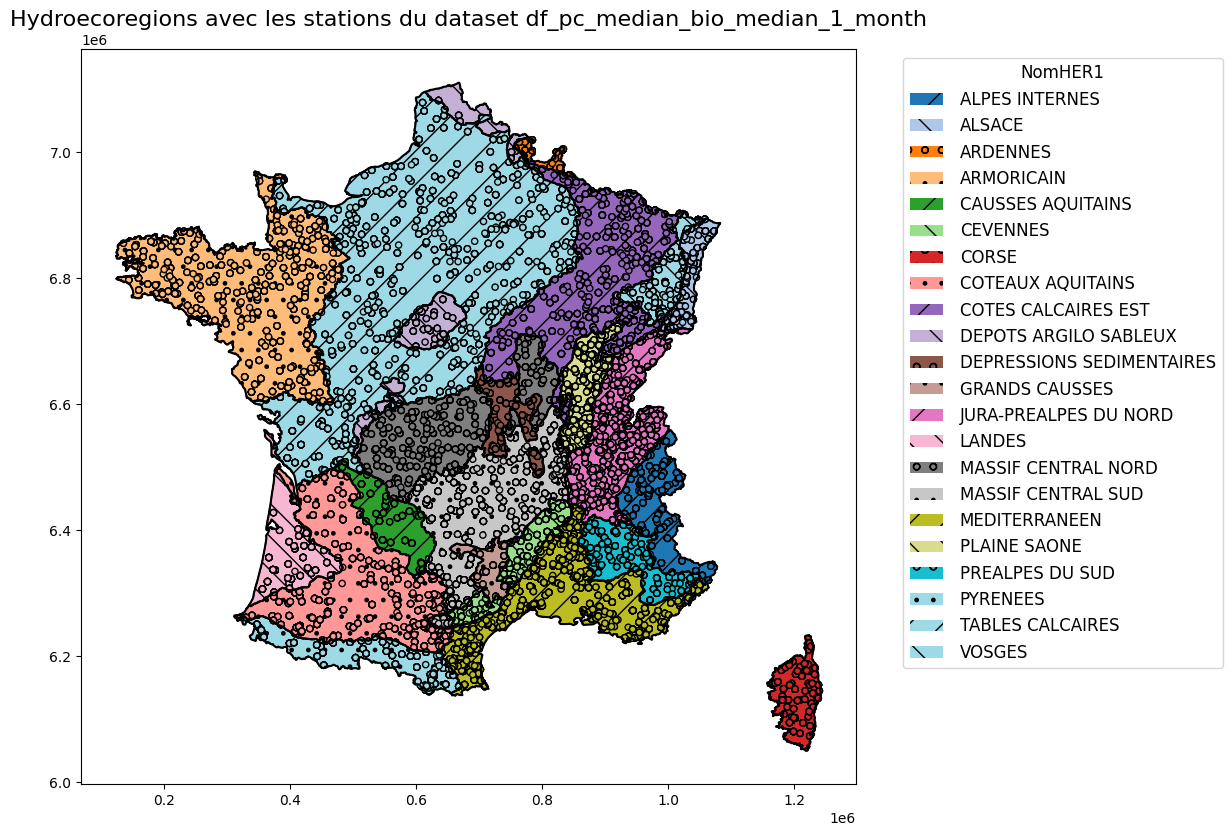

In [133]:
# Repr√©sentation des stations sur la carte des hydro√©cor√©gions
crs_lambert = 'PROJCS["RGF_1993_Lambert_93",GEOGCS["GCS_RGF_1993",DATUM["D_RGF_1993",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic"],PARAMETER["False_Easting",700000.0],PARAMETER["False_Northing",6600000.0],PARAMETER["Central_Meridian",3.0],PARAMETER["Standard_Parallel_1",49.0],PARAMETER["Standard_Parallel_2",44.0],PARAMETER["Latitude_Of_Origin",46.5],UNIT["Meter",1.0]]'
x_col = 'CoordXStationMesureEauxSurface'
y_col = 'CoordYStationMesureEauxSurface'
carto_i2m2 = gpd.GeoDataFrame(df_pc_median_bio_median_1_month_with_coords,crs=crs_lambert ,
                        geometry = gpd.GeoSeries(df_pc_median_bio_median_1_month_with_coords.agg(lambda x:geom.Point(x.loc[x_col],x.loc[y_col])  ,axis=1)))

# R√©cup√©ration des hydro√©cor√©gions pour les stations
HER_stations=carto_i2m2.sjoin(df_hydroregions.to_crs(crs_lambert),predicate='within').to_crs(crs_lambert)

fig, ax = plt.subplots(1, 1, figsize=(10, 30))

colors = plt.colormaps['tab20']
hatches = ['/', '\\', 'o', '.']
legend_elements = []

color_mapping = {}
for i, (name, region) in enumerate(df_hydroregions.groupby('NomHER1')):
    region = region.to_crs(crs_lambert)
    patch = region.plot(ax=ax, color=colors(i), hatch=hatches[i % len(hatches)], edgecolor='black', label=name)
    legend_elements.append(Patch(facecolor=colors(i), hatch=hatches[i % len(hatches)], label=name))
    color_mapping[name] = colors(i)

station_colors = HER_stations['NomHER1'].map(color_mapping)
HER_stations.plot(ax=ax, color=station_colors, markersize=20, edgecolor='black')

HER_lambert = df_hydroregions.to_crs(crs_lambert)
HER_lambert.boundary.plot(ax=ax, color='black')

ax.legend(handles=legend_elements, title='NomHER1', bbox_to_anchor=(1.05, 1), loc='upper left',  fontsize='large', title_fontsize='large', handletextpad=1)
ax.set_title('Hydroecoregions avec les stations du dataset df_pc_median_bio_median_1_month', fontsize=16)

plt.show()

In [134]:
print(f"Nombre de doublons dans df_stations : {df_stations.duplicated(subset='station').sum()}")
print(f"Nombre de doublons dans df_pc_median_bio_median_1_month_with_coords : {df_pc_median_bio_median_1_month_with_coords.duplicated(subset='station').sum()}")

Nombre de doublons dans df_stations : 7
Nombre de doublons dans df_pc_median_bio_median_1_month_with_coords : 18843


In [135]:
df_stations.drop_duplicates(subset='station', inplace=True)
df_pc_median_bio_median_1_month_with_coords.drop_duplicates(subset='station', inplace=True)

In [136]:
# R√©cup√©ration des hydro√©cor√©gions pour les stations dans df_stations
carto_i2m2_1 = gpd.GeoDataFrame(df_stations,crs=crs_lambert, geometry = gpd.GeoSeries(df_stations.agg(lambda x:geom.Point(x.loc['CoordXStationMesureEauxSurface'],x.loc['CoordYStationMesureEauxSurface'])  ,axis=1)))
HER_stations_1=carto_i2m2_1.sjoin(df_hydroregions.to_crs(crs_lambert),predicate='within').to_crs(crs_lambert)

# R√©cup√©ration des hydro√©cor√©gions pour les stations dans df_pc_median_bio_median_1_month_with_coords
carto_i2m2_2 = gpd.GeoDataFrame(df_pc_median_bio_median_1_month_with_coords,crs=crs_lambert, geometry = gpd.GeoSeries(df_pc_median_bio_median_1_month_with_coords.agg(lambda x:geom.Point(x.loc['CoordXStationMesureEauxSurface'],x.loc['CoordYStationMesureEauxSurface'])  ,axis=1)))
HER_stations_2=carto_i2m2_2.sjoin(df_hydroregions.to_crs(crs_lambert),predicate='within').to_crs(crs_lambert)

In [137]:
print(f"Nombre de doublons apr√®s jointure spatiale dans HER_stations_1 : {HER_stations_1.duplicated(subset='station').sum()}")
print(f"Nombre de doublons apr√®s jointure spatiale dans HER_stations_2 : {HER_stations_2.duplicated(subset='station').sum()}")

Nombre de doublons apr√®s jointure spatiale dans HER_stations_1 : 0
Nombre de doublons apr√®s jointure spatiale dans HER_stations_2 : 0


In [138]:
# Nombre de stations par r√©gion hydro√©cologique dans df_stations et dans df_pc_median_bio_median_1_month
# df_stations
stations_count_by_region_1 = HER_stations_1.groupby('NomHER1').size().reset_index(name='count')

# df_pc_median_bio_median_1_month
stations_count_by_region_2 = HER_stations_2.groupby('NomHER1').size().reset_index(name='count')

# comparaison du nombre de stations entre les deux dataframes
comparison = pd.merge(stations_count_by_region_1, stations_count_by_region_2, on='NomHER1', how='outer', suffixes=('_df_stations', '_df_pc_median'))
print(comparison)

                      NomHER1  count_df_stations  count_df_pc_median
0              ALPES INTERNES                156                  84
1                      ALSACE                352                  97
2                    ARDENNES                 63                  15
3                  ARMORICAIN                445                 249
4           CAUSSES AQUITAINS                 47                  31
5                    CEVENNES                106                  81
6                       CORSE                 63                  47
7           COTEAUX AQUITAINS                265                 188
8         COTES CALCAIRES EST               1008                 268
9       DEPOTS ARGILO SABLEUX                 47                  35
10  DEPRESSIONS SEDIMENTAIRES                 63                  43
11             GRANDS CAUSSES                 25                  19
12      JURA-PREALPES DU NORD                628                 401
13                     LANDES     

In [139]:
# Affichage du nombre de stations par hydro√©cor√©gion dans les 2 dataframes
comparison_sorted = comparison.sort_values('count_df_pc_median', ascending=True)

fig = go.Figure(data=[
    go.Bar(x=comparison_sorted['NomHER1'], y=comparison_sorted['count_df_stations'], name='df_stations'),
    go.Bar(x=comparison_sorted['NomHER1'], y=comparison_sorted['count_df_pc_median'], name='df_pc_median_bio_median_1_month')
])
fig.update_layout(title="Comparaison du nombre de stations par hydro√©cor√©gion", xaxis_title="Hydro√©cor√©gions", yaxis_title="Nombre de stations", barmode='group',  xaxis=dict(tickangle=90))
fig.show()

Certaines hydror√©gions sont tr√®s sous repr√©sent√©es, et les plus repr√©sent√©es ont au maximum 430 stations ce qui reste peu.

In [140]:
# Calcul de la perte
comparison['percentage_loss'] = ((comparison['count_df_stations'] - comparison['count_df_pc_median'])/ comparison['count_df_stations']) * 100
comparison['percentage_loss'] = comparison['percentage_loss'].fillna(0)
comparison.sort_values('percentage_loss', inplace=True)

In [141]:
# Affichage du pourcentage de perte du nombre de stations par hydro√©cor√©gion
fig = go.Figure(data=[go.Bar(x=comparison['NomHER1'], y=comparison['percentage_loss'], marker_color='orange', name='Pourcentage de perte')])
fig.update_layout(title="Pourcentage de perte des stations par hydro√©cor√©gion", xaxis_title="Hydro√©cor√©gions", yaxis_title="Pourcentage de perte (%)", xaxis=dict(tickangle=90))
fig.show()

In [142]:
# Calcul du nombre de stations perdues au total
total_stations_initial = comparison['count_df_stations'].sum()
total_stations_final = comparison['count_df_pc_median'].sum()
total_stations_perdue = total_stations_initial - total_stations_final

print(f"Nombre total de stations perdues : {total_stations_perdue}")
print(f"Pourcentage de stations perdues : {round((total_stations_perdue / total_stations_initial) * 100, 2)}%")


Nombre total de stations perdues : 3396
Pourcentage de stations perdues : 51.93%


Suite √† la fusion des diff√©rents datasets, nous constatons une perte significative de stations par rapport au dataset initial. Au total, plus de 3000 stations, soit environ 50 % des stations, ont √©t√© perdues. Cette perte est principalement due aux diff√©rences dans les codes de stations entre les tables, emp√™chant leur correspondance lors de la jointure.

La distribution des pertes par hydro√©cor√©gion montre que certaines r√©gions, comme les Vosges et les Ardennes, ont perdu une proportion importante de leurs stations, tandis que d'autres, comme le Massif Central Sud et la Plaine de la Sa√¥ne, en ont conserv√© une plus grande partie, avec cependant environ 20% de perte.  
Ces disparit√©s r√©gionales pourraient influencer les r√©sultats de nos analyses.

### Analyse des corr√©lations entre les caract√©ristiques

In [143]:
df_correl = df_pc_median_bio_median_1_month_with_coords.copy()

In [144]:
# Ajout des hydror√©gions pour voir si des caract√©ristiques y sont corr√©l√©es
carto_i2m2_correl = gpd.GeoDataFrame(df_correl,crs=crs_lambert, geometry = gpd.GeoSeries(df_correl.agg(lambda x:geom.Point(x.loc['CoordXStationMesureEauxSurface'],x.loc['CoordYStationMesureEauxSurface'])  ,axis=1)))
HER_stations_correl=carto_i2m2_correl.sjoin(df_hydroregions.to_crs(crs_lambert),predicate='within').to_crs(crs_lambert)
df_correl = HER_stations_correl.drop(columns=['geometry', 'index_right', 'NomHER1', 'gid']) 

In [145]:
df_correl['saison'] = df_correl['saison'].factorize()[0]

In [146]:
# Mapping des colonnes pour pouvoir afficher la matrice de corr√©lation correctement
column_mapping = {
    'Ammonium - Eau': 'NH4',
    'Azote Kjeldahl - Eau': 'NKjeldahl',
    'Carbone Organique - Eau': 'CO',
    'Conductivit√© √† 25¬∞C - Eau': 'Cond25',
    'Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Eau': 'DBO5',
    'Mati√®res en suspension - Eau': 'MES',
    'Nitrates - Eau': 'NO3',
    'Nitrites - Eau': 'NO2',
    'Orthophosphates (PO4) - Eau': 'PO4',
    'Oxyg√®ne dissous - Eau': 'O2',
    'Phosphore total - Eau': 'Ptot',
    'Potentiel en Hydrog√®ne (pH) - Eau': 'pH',
    'Taux de saturation en oxyg√®ne - Eau': 'O2_sat',
    'Temp√©rature de l\'Eau - Eau': 'TempEau',
    'Turbidit√© Formazine N√©ph√©lom√©trique - Eau': 'Turbidit√©',
    'I2M2': 'I2M2',
    'CoordXStationMesureEauxSurface': 'CoordX',
    'CoordYStationMesureEauxSurface': 'CoordY'
}

df_correl = df_correl.rename(columns=column_mapping, index=column_mapping)

In [147]:
# Cr√©ation de la matrice de corr√©lation
correlation_matrix = df_correl.corr()

np.fill_diagonal(correlation_matrix.values, np.nan)

fig = px.imshow(correlation_matrix,  text_auto=".1f",  color_continuous_scale='RdBu',  title="Matrice de corr√©lation",  labels=dict(x="Caract√©ristiques", y="Caract√©ristiques", color="Corr√©lation"),  zmin=-1,  zmax=1)
fig.update_layout(xaxis=dict(tickangle=45),  autosize=True,  title_x=0.5,  width=800,  height=800)

fig.show()

Cette matrice de corr√©lation r√©v√®le des relations entre plusieurs caract√©ristiques.  
Nous nous concentrons sur les suivantes : 

**I2M2** : Corr√©l√© n√©gativement √† Cond25, NO2, PO4 et Ptot, indiquant une d√©gradation biologique lorsque ces param√®tres augmentent. Positivement corr√©l√© √† l‚Äôoxyg√®ne dissous et son taux de saturation, soulignant leur importance pour la qualit√© biologique.

**Hydro√©cor√©gions** : Faibles corr√©lations avec la plupart des param√®tres (notamment le CO), mais sugg√©rant que certaines caract√©ristiques physicochimiques pourraient √™tre sp√©cifiques √† certaines r√©gions.

**Saisons** : Corr√©l√©es √† la temp√©rature de l‚Äôeau, et √† l‚ÄôO2, refl√©tant les variations saisonni√®res pr√©vues.

In [148]:
# TODO Zo√© : Je ne suis pas sure que la matrice de cor√©lation soit √† lire comme √ßa, si tu peux v√©rifier merci :)

## Clustering des stations

### D√©marche

Dans cette partie, nous cherchons √† r√©pondre √† notre probl√©matique initiale :  
**Est-il possible de retrouver les hydro√©cor√©gions √† partir des donn√©es physicochimiques et hydrobiologiques ?**

Pour cela, nous avons r√©alis√© un clustering pour regrouper les stations en fonction de leurs caract√©ristiques. Cette approche nous permet d‚Äôidentifier des regroupements naturels bas√©s sur les donn√©es, susceptibles de refl√©ter les hydro√©cor√©gions, tout en capturant des relations complexes et non lin√©aires que les corr√©lations simples ne r√©v√®lent pas.

Nous avons commenc√© par un nettoyage des donn√©es, incluant la gestion des valeurs manquantes et des variables non num√©riques. Les donn√©es ont √©t√© normalis√©es, et nous avons supprim√© les colonnes inutiles ou susceptibles d‚Äôinfluencer artificiellement le clustering, comme les identifiants de stations.

Ensuite, nous avons d√©termin√© le nombre optimal de clusters en utilisant deux m√©thodes : la m√©thode du coude (bas√©e sur la diminution de l'inertie) et le coefficient Davies-Bouldin (√©valuant la s√©paration et la compacit√© des clusters).

Une fois le nombre de clusters d√©fini, nous avons appliqu√© l‚Äôalgorithme K-means pour attribuer un cluster √† chaque station. 

Enfin, nous avons analys√© les r√©sultats en comparant les clusters obtenus avec les hydro√©cor√©gions afin d‚Äô√©valuer leur coh√©rence.

### Pr√©paration des donn√©es

#### Gestion des donn√©es manquantes

In [149]:
df_pc_median_bio_median_1_month_with_coords.isnull().sum()

station                                                         0
ann√©e                                                           0
saison                                                          0
Ammonium - Eau                                                464
Azote Kjeldahl - Eau                                          540
Carbone Organique - Eau                                       186
Conductivit√© √† 25¬∞C - Eau                                     182
Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Eau     213
Diuron - Eau                                                 1705
Mati√®res en suspension - Eau                                  105
Nitrates - Eau                                                364
Nitrites - Eau                                                295
Orthophosphates (PO4) - Eau                                   307
Oxyg√®ne dissous - Eau                                         216
Phosphore total - Eau                                         173
Pot

In [150]:
missing_percentage = df_pc_median_bio_median_1_month_with_coords.isnull().mean() * 100
print(missing_percentage)

station                                                       0.000000
ann√©e                                                         0.000000
saison                                                        0.000000
Ammonium - Eau                                               14.669617
Azote Kjeldahl - Eau                                         17.072400
Carbone Organique - Eau                                       5.880493
Conductivit√© √† 25¬∞C - Eau                                     5.754031
Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Eau     6.734113
Diuron - Eau                                                 53.904521
Mati√®res en suspension - Eau                                  3.319633
Nitrates - Eau                                               11.508062
Nitrites - Eau                                                9.326589
Orthophosphates (PO4) - Eau                                   9.705975
Oxyg√®ne dissous - Eau                                         6.828960

In [151]:
# plus de 40 % de donn√©es manquantes pour Diuron - Eau
# on peut supprimer cette colonne
df_pc_median_bio_median_1_month_with_coords.drop(columns=['Diuron - Eau'], inplace=True)

In [152]:
# Calculer le nombre de valeurs manquantes par ligne
missing_values_per_row = df_pc_median_bio_median_1_month_with_coords.isnull().sum(axis=1)
missing_summary = missing_values_per_row.value_counts().reset_index()
missing_summary.columns = ['Nombre de valeurs manquantes', 'Nombre de lignes']
print(missing_summary.sort_values('Nombre de valeurs manquantes'))

    Nombre de valeurs manquantes  Nombre de lignes
1                              0               964
0                              1              1410
2                              2               287
4                              3                77
5                              4                67
3                              5               112
10                             6                32
7                              7                48
11                             8                23
14                             9                 4
8                             10                40
9                             11                37
12                            13                 6
6                             14                51
13                            15                 5


In [153]:
## TODO on fait quoi ici, on drop des lignes ou pas ??
# ON A IMPUTE PAR LA MEDIANE DU COUP LOL

Nous avons imput√© les donn√©es manquantes par leur m√©diane. Nous avons √©galement test√© d'imputer ces donn√©es par leur moyenne mais les r√©sultats de clusterings √©taient l√©g√®rement moins bons.

In [154]:
# Imputation des valeurs manquantes avec la m√©diane
imputer = SimpleImputer(strategy='median') # ici on pourrait aussi mettre mean
colonnes = df_pc_median_bio_median_1_month_with_coords.columns
colonnes = colonnes.drop('station')
colonnes = colonnes.drop('ann√©e')
colonnes = colonnes.drop('saison')
colonnes = colonnes.drop('I2M2')
df_pc_median_bio_median_1_month_with_coords[colonnes] = imputer.fit_transform(df_pc_median_bio_median_1_month_with_coords[colonnes])
df_pc_median_bio_median_1_month_with_coords.isnull().sum()

station                                                      0
ann√©e                                                        0
saison                                                       0
Ammonium - Eau                                               0
Azote Kjeldahl - Eau                                         0
Carbone Organique - Eau                                      0
Conductivit√© √† 25¬∞C - Eau                                    0
Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Eau    0
Mati√®res en suspension - Eau                                 0
Nitrates - Eau                                               0
Nitrites - Eau                                               0
Orthophosphates (PO4) - Eau                                  0
Oxyg√®ne dissous - Eau                                        0
Phosphore total - Eau                                        0
Potentiel en Hydrog√®ne (pH) - Eau                            0
Taux de saturation en oxyg√®ne - Eau           

#### Gestion des donn√©es non num√©riques

In [155]:
# Mapper chaque saison √† un trimestre
saison_to_quarter = {
    "Hiver": 1,
    "Printemps": 2,
    "√ât√©": 3,
    "Automne": 4
}
df_pc_median_bio_median_1_month_with_coords['trimestre'] = df_pc_median_bio_median_1_month_with_coords['saison'].map(saison_to_quarter)
# drop saison
df_pc_median_bio_median_1_month_with_coords.drop(columns=['saison'], inplace=True)
df_pc_median_bio_median_1_month_with_coords.head(5)

station  ann√©e  Ammonium - Eau  Azote Kjeldahl - Eau  \
0   5001800   2007            0.04                   1.0   
4   5005350   2007            0.03                   1.0   
18  5005400   2007            0.03                   1.0   
32  5005950   2007            0.05                   1.0   
46  5006100   2007            0.12                   1.0   

    Carbone Organique - Eau  Conductivit√© √† 25¬∞C - Eau  \
0                      3.50                      765.0   
4                      2.40                      632.0   
18                     2.15                      646.0   
32                     1.30                      597.0   
46                     1.00                      613.0   

    Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Eau  \
0                                                0.50           
4                                                0.75           
18                                               0.85           
32                                               1.10           
46                                               2.30           

    Mati√®res en suspension - Eau  Nitrates - Eau  Nitrites - Eau  ...  \
0                            3.0            36.2           0.090  ...   
4                            5.5            30.2           0.085  ...   
18                           4.0            29.5           0.150  ...   
32                          12.0            48.7           0.110  ...   
46                           4.0            51.5           0.100  ...   

    Oxyg√®ne dissous - Eau  Phosphore total - Eau  \
0                     8.1                   0.05   
4                     7.9                   0.14   
18                    6.3                   0.07   
32                    7.6                   0.11   
46                    6.9                   0.10   

    Potentiel en Hydrog√®ne (pH) - Eau  Taux de saturation en oxyg√®ne - Eau  \
0                                 7.9                                 89.0   
4                                 7.9                                 73.0   
18                                7.9                                 63.0   
32                                8.2                                 80.0   
46                                7.8                                 72.0   

    Temp√©rature de l'Eau - Eau  Turbidit√© Formazine N√©ph√©lom√©trique - Eau  \
0                         18.6                                       4.95   
4                         14.7                                       4.95   
18                        16.1                                       4.95   
32                        19.5                                       8.50   
46                        16.8                                       4.95   

      I2M2  CoordXStationMesureEauxSurface  CoordYStationMesureEauxSurface  \
0   0.3004                        399856.0                       6531980.0   
4   0.4851                        450151.0                       6572920.0   
18  0.5725                        446087.0                       6568450.0   
32  0.6915                        451708.0                       6565540.0   
46  0.2938                        459757.0                       6561330.0   

    trimestre  
0           3  
4           4  
18          4  
32          3  
46          3  

[5 rows x 21 columns]

In [156]:
# Convertir l'identifiant de station en variable cat√©gorielle (cela cr√©e un encodage num√©rique)
df_pc_median_bio_median_1_month_with_coords['station'] = df_pc_median_bio_median_1_month_with_coords['station'].astype(str)
df_pc_median_bio_median_1_month_with_coords['trimestre'] = df_pc_median_bio_median_1_month_with_coords['trimestre'].astype(int)
df_pc_median_bio_median_1_month_with_coords['ann√©e'] = df_pc_median_bio_median_1_month_with_coords['ann√©e'].astype(int)
df_pc_median_bio_median_1_month_with_coords.dtypes

station                                                       object
ann√©e                                                          int64
Ammonium - Eau                                               float64
Azote Kjeldahl - Eau                                         float64
Carbone Organique - Eau                                      float64
Conductivit√© √† 25¬∞C - Eau                                    float64
Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Eau    float64
Mati√®res en suspension - Eau                                 float64
Nitrates - Eau                                               float64
Nitrites - Eau                                               float64
Orthophosphates (PO4) - Eau                                  float64
Oxyg√®ne dissous - Eau                                        float64
Phosphore total - Eau                                        float64
Potentiel en Hydrog√®ne (pH) - Eau                            float64
Taux de saturation en oxyg

#### Suppression des colonnes

Nous supprimons les colonnes des coordonn√©es, ainsi que la colonne station, afin de ne pas influencer le clustering.

In [157]:
df_pc_median_bio_median_1_month_c = df_pc_median_bio_median_1_month_with_coords.copy()

In [158]:
df_pc_median_bio_median_1_month_c = df_pc_median_bio_median_1_month_with_coords.drop(columns=['CoordXStationMesureEauxSurface', 'CoordYStationMesureEauxSurface'])
df_clustering = df_pc_median_bio_median_1_month_c.drop(columns=['station'])

In [159]:
df_clustering.head(5)

ann√©e  Ammonium - Eau  Azote Kjeldahl - Eau  Carbone Organique - Eau  \
0    2007            0.04                   1.0                     3.50   
4    2007            0.03                   1.0                     2.40   
18   2007            0.03                   1.0                     2.15   
32   2007            0.05                   1.0                     1.30   
46   2007            0.12                   1.0                     1.00   

    Conductivit√© √† 25¬∞C - Eau  \
0                       765.0   
4                       632.0   
18                      646.0   
32                      597.0   
46                      613.0   

    Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Eau  \
0                                                0.50           
4                                                0.75           
18                                               0.85           
32                                               1.10           
46                                               2.30           

    Mati√®res en suspension - Eau  Nitrates - Eau  Nitrites - Eau  \
0                            3.0            36.2           0.090   
4                            5.5            30.2           0.085   
18                           4.0            29.5           0.150   
32                          12.0            48.7           0.110   
46                           4.0            51.5           0.100   

    Orthophosphates (PO4) - Eau  Oxyg√®ne dissous - Eau  Phosphore total - Eau  \
0                          0.05                    8.1                   0.05   
4                          0.29                    7.9                   0.14   
18                         0.11                    6.3                   0.07   
32                         0.08                    7.6                   0.11   
46                         0.05                    6.9                   0.10   

    Potentiel en Hydrog√®ne (pH) - Eau  Taux de saturation en oxyg√®ne - Eau  \
0                                 7.9                                 89.0   
4                                 7.9                                 73.0   
18                                7.9                                 63.0   
32                                8.2                                 80.0   
46                                7.8                                 72.0   

    Temp√©rature de l'Eau - Eau  Turbidit√© Formazine N√©ph√©lom√©trique - Eau  \
0                         18.6                                       4.95   
4                         14.7                                       4.95   
18                        16.1                                       4.95   
32                        19.5                                       8.50   
46                        16.8                                       4.95   

      I2M2  trimestre  
0   0.3004          3  
4   0.4851          4  
18  0.5725          4  
32  0.6915          3  
46  0.2938          3

#### Normalisation des donn√©es

In [160]:
#Normalisation des donn√©es pour quelles ait toutes la m√™me importance
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_clustering)
normalized_data = pd.DataFrame(normalized_data, columns=df_clustering.columns)

### Recherche du nombre de clusters optimal

In [161]:
nb_hydroecoregions = df_hydroregions['CdHER1'].nunique()
print("Nombre d'hydro√©cor√©gions : ", nb_hydroecoregions)

Nombre d'hydro√©cor√©gions :  22


In [162]:
# Plage des valeurs de k √† tester
k_values = range(nb_hydroecoregions-5, nb_hydroecoregions+5)

In [163]:
# Calcule de l'inertie et du score de Davies-Bouldin pour chaque valeur de k
davies_bouldin_scores = []
inertia = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

    cluster_labels = kmeans.fit_predict(normalized_data)
    davies_bouldin_scores.append(davies_bouldin_score(normalized_data, cluster_labels))

#### M√©thode du coude

La m√©thode du coude consiste √† observer la diminution de l'inertie (somme des erreurs quadratiques intra-clusters) en fonction du nombre de clusters. Le point o√π la diminution devient moins significative peut indiquer le nombre optimal de clusters.

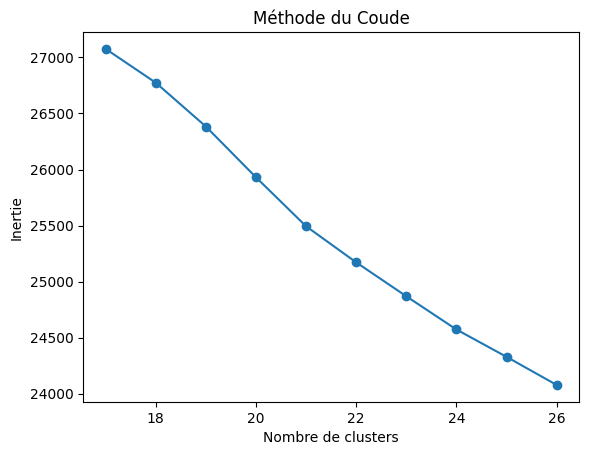

In [164]:
# Tracer l'inertie pour observer le coude
plt.plot(k_values, inertia, marker='o')
plt.title('M√©thode du Coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

Nous n'arrivons pas √† voir de coude, cela rend impossible √† d√©terminer le nombre optimal de clusters. Nous allons donc utiliser le coefficient Davies-Bouldin pour faire notre choix.

#### Coefficient Davies-Bouldin

Le coefficient Davies-Bouldin √©value la qualit√© des clusters en mesurant leur compacit√© et leur s√©paration. Une valeur plus faible indique des clusters mieux d√©finis.

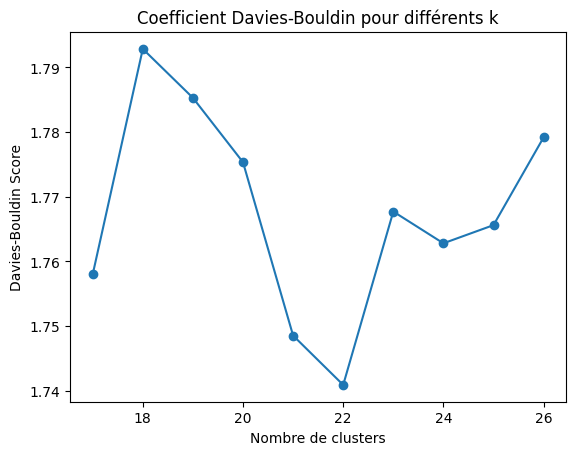

In [165]:
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Coefficient Davies-Bouldin pour diff√©rents k')
plt.xlabel('Nombre de clusters')
plt.ylabel('Davies-Bouldin Score')
plt.show()

Ici, nous voyons clairement que le score de Davies-Bouldin est minimal pour 22 clusters, ce qui est coh√©rent avec le nombre d'hydror√©gions. Nous allons donc utiliser k = 22 pour notre clustering.

In [166]:
# TODO CHARLOTTE : √† refaire avec le nombre de clusters qu'on voit dans notre df
# PAS FAIT MAIS JE PENSE PAS BESOIN DU COUP
"""
-5 +5

dupliquer les cellules et essayer (pas le faire directement ici, on conserve les 2 versions)
"""

'\n-5 +5\n\ndupliquer les cellules et essayer (pas le faire directement ici, on conserve les 2 versions)\n'

### R√©alisation du clustering avec K-Means

#### Clustering

In [167]:
nb_clusters = 22 #nb_hydroecoregions

In [168]:
# Clustering sans les coordonn√©es
"""
df_clustering = df_pc_median_bio_median_1_month_c.copy()
df_clustering = df_pc_median_bio_median_1_month_c.drop(columns=['station'])
"""

"\ndf_clustering = df_pc_median_bio_median_1_month_c.copy()\ndf_clustering = df_pc_median_bio_median_1_month_c.drop(columns=['station'])\n"

In [169]:
#Normalisation des donn√©es pour quelles ait toutes la m√™me importance
"""
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_clustering)
normalized_data = pd.DataFrame(normalized_data, columns=df_clustering.columns)
"""

'\nscaler = StandardScaler()\nnormalized_data = scaler.fit_transform(df_clustering)\nnormalized_data = pd.DataFrame(normalized_data, columns=df_clustering.columns)\n'

In [170]:
kmeans = KMeans(n_clusters=nb_clusters, random_state=42)
kmeans.fit(normalized_data)

KMeans(n_clusters=22, random_state=42)

#### Attribution des clusters

In [171]:
df_pc_median_bio_median_1_month_with_clusters = df_pc_median_bio_median_1_month_c.copy()

In [172]:
df_pc_median_bio_median_1_month_with_clusters['cluster'] = kmeans.labels_

#### Analyse des caract√©ristiques des clusters

In [173]:
# Analyse des centres des clusters
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_clustering.columns)
print("Centres des clusters :")
print(cluster_centers)

# Variabilit√© des caract√©ristiques par cluster
influence = cluster_centers.std(axis=0)
print("\nInfluence des caract√©ristiques :")
print(influence.sort_values(ascending=False))

Centres des clusters :
       ann√©e  Ammonium - Eau  Azote Kjeldahl - Eau  Carbone Organique - Eau  \
0  -0.963262       -0.058739              0.220577                 0.632687   
1  -0.438219       -0.162830              0.015745                -0.288010   
2   0.113245       -0.114161             -0.053301                -0.074332   
3  -0.316753       -0.111506              0.453017                 0.114654   
4   0.553991        0.075895              0.355272                 2.425890   
5   0.640267       -0.229990             -0.653020                 0.290484   
6  -0.496600       -0.153721              0.194069                -0.573820   
7   0.237717        0.478516              0.211662                 0.507570   
8  -0.169914        0.043870              0.217924                -0.851505   
9   0.004050        3.442505              2.189131                 1.058802   
10  0.112195        0.390593              0.398106                 0.739302   
11  0.441780       -0.249736

In [174]:
# Affichage des caract√©ristiques avec les plus grandes variabilit√©s entre clusters
# = Caract√©ristiques les plus influentes
fig = px.bar(influence.sort_values(ascending=False),
             title="Influence des caract√©ristiques par cluster",
             labels={'index': 'Caract√©ristiques', 'value': "√âcart-type des centres des clusters"})

fig.update_layout(xaxis_tickangle=45, width=800, height=600, showlegend=False)
                  
fig.show()

On peut voir que la `Turbidit√© Formazine N√©ph√©lom√©trique - Eau` et les `Mati√®res en suspension - Eau` sont les caract√©ristiques les plus variables entre les clusters. Elles ont donc un r√¥le important dans la diff√©rentiation des clusters. 

D'autres param√®tres, comme l'`Ann√©e` ou la `Temp√©rature de l'eau` ont une influence beaucoup plus faible, et permettent donc moins de distinguer les clusters.

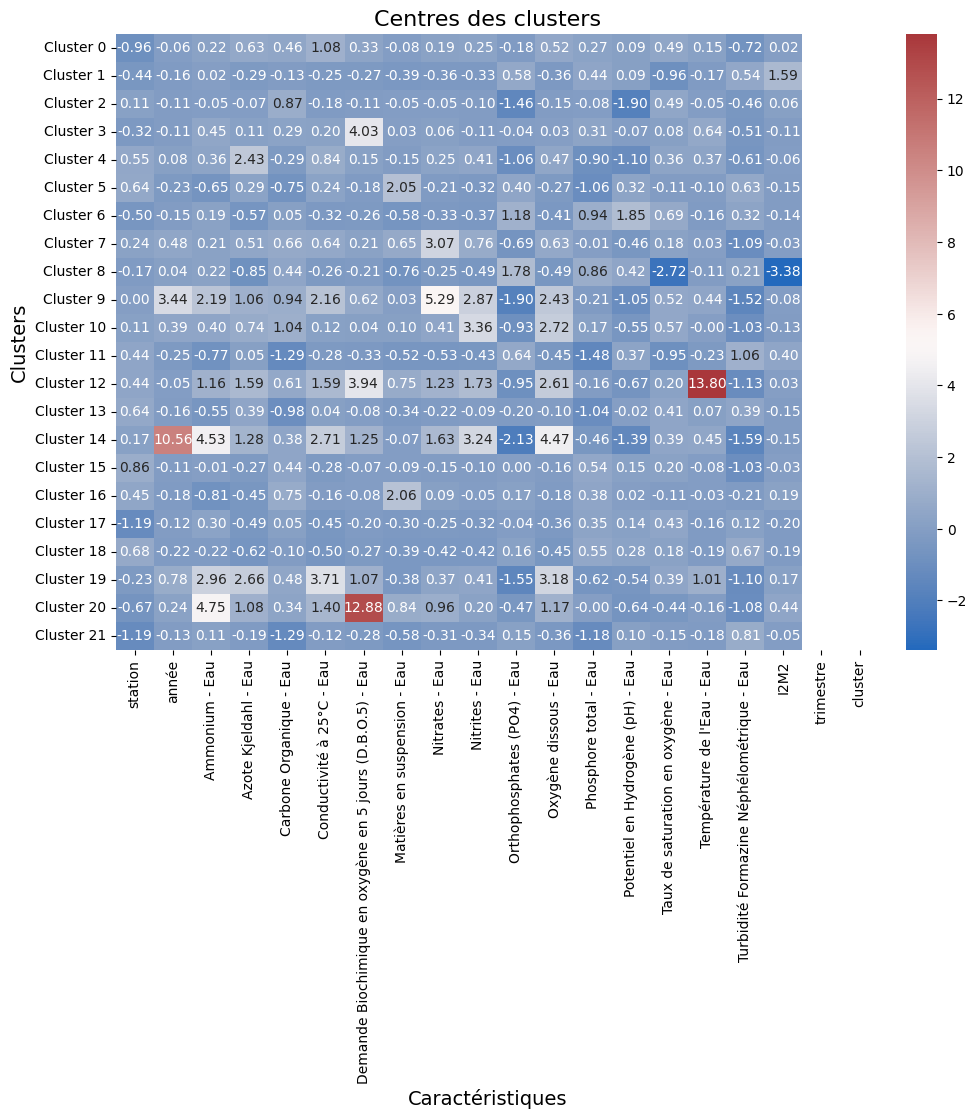

In [526]:
# Matrice des centres des clusters

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers, annot=True, fmt=".2f", cmap="vlag", xticklabels=df_pc_median_bio_median_1_month_with_clusters.columns, yticklabels=[f'Cluster {i}' for i in range(len(cluster_centers))])
plt.title("Centres des clusters", fontsize=16)
plt.xlabel("Caract√©ristiques", fontsize=14)
plt.ylabel("Clusters", fontsize=14)
plt.show()

La matrice des centres des clusters montre les valeurs typiques des caract√©ristiques dans chaque cluster.

On peut voir que pour le cluster 14, par exemple, des valeurs sont √©lev√©es pour certains param√®tres, indiquant des regroupements li√©s aux caract√©ristiques physicochimiques ou hydrobiologique.

### Etude des r√©sultats obtenus

#### Combien d'enregistrements class√©s dans la bonne hydror√©gion ? 

In [183]:
# Attribution des clusters aux stations
df_pc_median_bio_median_1_month_with_clusters_with_coord = df_pc_median_bio_median_1_month_with_coords.copy()
df_pc_median_bio_median_1_month_with_clusters_with_coord['cluster'] = kmeans.labels_

In [184]:
# Ajout de l'hydro√©cor√©gion r√©elle pour chaque station
carto_i2m2_her = gpd.GeoDataFrame(df_pc_median_bio_median_1_month_with_clusters_with_coord, crs=crs_lambert, 
                                  geometry=gpd.GeoSeries(df_pc_median_bio_median_1_month_with_clusters_with_coord.agg(lambda x: geom.Point(x.loc['CoordXStationMesureEauxSurface'], x.loc['CoordYStationMesureEauxSurface']), axis=1)))
HER_stations_her = carto_i2m2_her.sjoin(df_hydroregions.to_crs(crs_lambert), predicate='within').to_crs(crs_lambert)

df_pc_median_bio_median_1_month_with_clusters_etude = HER_stations_her.drop(columns=['geometry', 'index_right', 'gid'])
df_pc_median_bio_median_1_month_with_clusters_etude.rename(columns={'CdHER1': 'hydroecoregion'}, inplace=True)

In [ ]:
# TODO : Ici

In [179]:
# Ajout des classes dominantes aux stations
dominant_class_per_cluster = df_pc_median_bio_median_1_month_with_clusters_etude.groupby('cluster')['hydroecoregion'].agg(lambda x: x.mode()[0]).reset_index()
dominant_class_per_cluster.columns = ['cluster', 'dominant_hydroecoregion']
df_pc_median_bio_median_1_month_with_clusters_etude = df_pc_median_bio_median_1_month_with_clusters_etude.merge(dominant_class_per_cluster, on='cluster', how='left')

In [ ]:
# TODO : Afficher quel cluster est associ√© √† quelle hydro√©cor√©gion

In [180]:
# Ajouter une colonne qui indique si la station a √©t√© bien class√©e
df_pc_median_bio_median_1_month_with_clusters_etude['correct_classification'] = df_pc_median_bio_median_1_month_with_clusters_etude['hydroecoregion'] == df_pc_median_bio_median_1_month_with_clusters_etude['dominant_hydroecoregion']

In [182]:
df_pc_median_bio_median_1_month_with_clusters_etude.head(5)

station  ann√©e  Ammonium - Eau  Azote Kjeldahl - Eau  \
0  5001800   2007            0.04                   1.0   
1  5005350   2007            0.03                   1.0   
2  5005400   2007            0.03                   1.0   
3  5005950   2007            0.05                   1.0   
4  5006100   2007            0.12                   1.0   

   Carbone Organique - Eau  Conductivit√© √† 25¬∞C - Eau  \
0                     3.50                      765.0   
1                     2.40                      632.0   
2                     2.15                      646.0   
3                     1.30                      597.0   
4                     1.00                      613.0   

   Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Eau  \
0                                               0.50           
1                                               0.75           
2                                               0.85           
3                                               1.10           
4                                               2.30           

   Mati√®res en suspension - Eau  Nitrates - Eau  Nitrites - Eau  ...  \
0                           3.0            36.2           0.090  ...   
1                           5.5            30.2           0.085  ...   
2                           4.0            29.5           0.150  ...   
3                          12.0            48.7           0.110  ...   
4                           4.0            51.5           0.100  ...   

   Turbidit√© Formazine N√©ph√©lom√©trique - Eau    I2M2  \
0                                       4.95  0.3004   
1                                       4.95  0.4851   
2                                       4.95  0.5725   
3                                       8.50  0.6915   
4                                       4.95  0.2938   

   CoordXStationMesureEauxSurface  CoordYStationMesureEauxSurface  trimestre  \
0                        399856.0                       6531980.0          3   
1                        450151.0                       6572920.0          4   
2                        446087.0                       6568450.0          4   
3                        451708.0                       6565540.0          3   
4                        459757.0                       6561330.0          3   

   cluster  hydroecoregion           NomHER1  dominant_hydroecoregion  \
0       16               9  TABLES CALCAIRES                        9   
1        2               9  TABLES CALCAIRES                        6   
2        2               9  TABLES CALCAIRES                        6   
3       16               9  TABLES CALCAIRES                        9   
4       16               9  TABLES CALCAIRES                        9   

   correct_classification  
0                    True  
1                   False  
2                   False  
3                    True  
4                    True  

[5 rows x 26 columns]

In [181]:
num_correctly_classified = df_pc_median_bio_median_1_month_with_clusters_etude['correct_classification'].sum()
total_stations = df_pc_median_bio_median_1_month_with_clusters_etude.shape[0]
accuracy = num_correctly_classified / total_stations

print(f"Nombre de stations bien class√©es: {num_correctly_classified}/{total_stations}")
print(f"Taux de classification correcte: {accuracy * 100:.2f}%")

Nombre de stations bien class√©es: 1053/3144
Taux de classification correcte: 33.49%


#### Quels trimestres pr√©sentent le plus de stations bien class√©es ?

In [533]:
df_pc_median_bio_median_1_month_with_clusters_etude['annee_trimestre'] = df_pc_median_bio_median_1_month_with_clusters_etude['ann√©e'].astype(str) + "-T" + df_pc_median_bio_median_1_month_with_clusters_etude['trimestre'].astype(str)

In [534]:
stations_correct = df_pc_median_bio_median_1_month_with_clusters_etude[df_pc_median_bio_median_1_month_with_clusters_etude['correct_classification']]
stations_correct_count = stations_correct.groupby('annee_trimestre')['station'].nunique().reset_index()
stations_correct_count.columns = ['annee_trimestre', 'stations_correctement_class√©es']

In [535]:
total_stations_count = df_pc_median_bio_median_1_month_with_clusters_etude.groupby('annee_trimestre')['station'].nunique().reset_index()
total_stations_count.columns = ['annee_trimestre', 'stations_totales']

In [536]:
merged_counts = pd.merge(total_stations_count, stations_correct_count, on='annee_trimestre', how='left')
merged_counts['stations_correctement_class√©es'] = merged_counts['stations_correctement_class√©es'].fillna(0)  # Remplir les valeurs manquantes par 0
merged_counts['pourcentage_correct'] = (merged_counts['stations_correctement_class√©es'] / merged_counts['stations_totales']) * 100

In [ ]:
fig = px.bar(merged_counts, x='annee_trimestre', y='stations_correctement_class√©es', title='Nombre de Stations Correctement Class√©es par Ann√©e-Trimestre',labels={'annee_trimestre': 'Ann√©e - Trimestre', 'stations_correctement_class√©es': 'Nombre de Stations Correctement Class√©es'},text='stations_correctement_class√©es')
fig.update_layout(xaxis_tickangle=45, width=900, height=600, showlegend=False, xaxis_title="Ann√©e - Trimestre", yaxis_title="Nombre de Stations Correctement Class√©es")

fig.show()

In [538]:
#dominant_clusters = df_pc_median_bio_median_1_month_with_clusters.groupby('station')['cluster'].agg(lambda x: x.value_counts().idxmax()).reset_index()
#dominant_clusters.columns = ['station', 'dominant_cluster']

### Score de silhouette

In [187]:
# Calculer le score de la silhouette
score = silhouette_score(df_pc_median_bio_median_1_month_c, df_pc_median_bio_median_1_month_with_clusters['cluster'])
print(f"Silhouette score: {score}")

Silhouette score: -0.5217015301677785


In [188]:
# Cr√©er un DataFrame pour calculer le pourcentage d'appartenance des stations aux clusters
cluster_distribution = df_pc_median_bio_median_1_month_with_clusters.groupby('station')['cluster'].value_counts(normalize=True).unstack().fillna(0) * 100
print(cluster_distribution)

cluster   0    1    2    3      4    5    6      7    8      9   ...   12  \
station                                                          ...        
1000477  0.0  0.0  0.0  0.0    0.0  0.0  0.0  100.0  0.0    0.0  ...  0.0   
1000602  0.0  0.0  0.0  0.0    0.0  0.0  0.0    0.0  0.0    0.0  ...  0.0   
1000605  0.0  0.0  0.0  0.0    0.0  0.0  0.0    0.0  0.0    0.0  ...  0.0   
1001122  0.0  0.0  0.0  0.0  100.0  0.0  0.0    0.0  0.0    0.0  ...  0.0   
1001131  0.0  0.0  0.0  0.0  100.0  0.0  0.0    0.0  0.0    0.0  ...  0.0   
...      ...  ...  ...  ...    ...  ...  ...    ...  ...    ...  ...  ...   
6999125  0.0  0.0  0.0  0.0    0.0  0.0  0.0    0.0  0.0  100.0  ...  0.0   
6999137  0.0  0.0  0.0  0.0    0.0  0.0  0.0    0.0  0.0    0.0  ...  0.0   
6999153  0.0  0.0  0.0  0.0    0.0  0.0  0.0    0.0  0.0    0.0  ...  0.0   
6999176  0.0  0.0  0.0  0.0    0.0  0.0  0.0    0.0  0.0    0.0  ...  0.0   
6999178  0.0  0.0  0.0  0.0    0.0  0.0  0.0    0.0  0.0    0.0  ...  0.0   

In [189]:
# combien de lignes dans le dataframe ?
df_pc_median_bio_median_1_month_with_clusters.shape[0]

3163

In [190]:
# combien de stations diff√©rentes ?
df_pc_median_bio_median_1_month_with_clusters['station'].nunique()

3163

In [191]:
stations_100_percent = cluster_distribution[cluster_distribution.eq(100.0).sum(axis=1) == 1]
print("Stations √† 100% dans un seul cluster :")
print(stations_100_percent.shape)

Stations √† 100% dans un seul cluster :
(3163, 22)


Toutes les stations sont donc √† 100% dans un cluster : super !

In [192]:
stations_multicluster = cluster_distribution[cluster_distribution.eq(100).sum(axis=1) > 1]
print("Stations r√©parties dans plusieurs clusters :")
print(stations_multicluster.shape)

Stations r√©parties dans plusieurs clusters :
(0, 22)


### Visualiser sur la map les stations dans leur cluster respectif avec une couleur


## TODO ensuite les voir dans les hydroecoregions


In [193]:
# join df_results avec df_stations pour r√©cup√©rer CoordXStationMesureEauxSurface, CoordYStationMesureEauxSurface
df_coord_stations = df_stations.copy()
df_coord_stations = df_coord_stations[['station', 'CoordXStationMesureEauxSurface', 'CoordYStationMesureEauxSurface']]
df_coord_stations['station'] = df_coord_stations['station'].astype(str)
print(df_coord_stations.dtypes)
df_results_coord = pd.merge(df_pc_median_bio_median_1_month_with_clusters, df_coord_stations, on='station', how='inner')
df_results_coord.head(5)

station                            object
CoordXStationMesureEauxSurface    float64
CoordYStationMesureEauxSurface    float64
dtype: object


station  ann√©e  Ammonium - Eau  Azote Kjeldahl - Eau  \
0  5001800   2007            0.04                   1.0   
1  5005350   2007            0.03                   1.0   
2  5005400   2007            0.03                   1.0   
3  5005950   2007            0.05                   1.0   
4  5006100   2007            0.12                   1.0   

   Carbone Organique - Eau  Conductivit√© √† 25¬∞C - Eau  \
0                     3.50                      765.0   
1                     2.40                      632.0   
2                     2.15                      646.0   
3                     1.30                      597.0   
4                     1.00                      613.0   

   Demande Biochimique en oxyg√®ne en 5 jours (D.B.O.5) - Eau  \
0                                               0.50           
1                                               0.75           
2                                               0.85           
3                                               1.10           
4                                               2.30           

   Mati√®res en suspension - Eau  Nitrates - Eau  Nitrites - Eau  ...  \
0                           3.0            36.2           0.090  ...   
1                           5.5            30.2           0.085  ...   
2                           4.0            29.5           0.150  ...   
3                          12.0            48.7           0.110  ...   
4                           4.0            51.5           0.100  ...   

   Phosphore total - Eau  Potentiel en Hydrog√®ne (pH) - Eau  \
0                   0.05                                7.9   
1                   0.14                                7.9   
2                   0.07                                7.9   
3                   0.11                                8.2   
4                   0.10                                7.8   

   Taux de saturation en oxyg√®ne - Eau  Temp√©rature de l'Eau - Eau  \
0                                 89.0                        18.6   
1                                 73.0                        14.7   
2                                 63.0                        16.1   
3                                 80.0                        19.5   
4                                 72.0                        16.8   

   Turbidit√© Formazine N√©ph√©lom√©trique - Eau    I2M2  trimestre  cluster  \
0                                       4.95  0.3004          3       16   
1                                       4.95  0.4851          4        2   
2                                       4.95  0.5725          4        2   
3                                       8.50  0.6915          3       16   
4                                       4.95  0.2938          3       16   

   CoordXStationMesureEauxSurface  CoordYStationMesureEauxSurface  
0                        399856.0                       6531980.0  
1                        450151.0                       6572920.0  
2                        446087.0                       6568450.0  
3                        451708.0                       6565540.0  
4                        459757.0                       6561330.0  

[5 rows x 22 columns]

C:\Users\charl\AppData\Local\Temp\ipykernel_23540\568544501.py:20: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



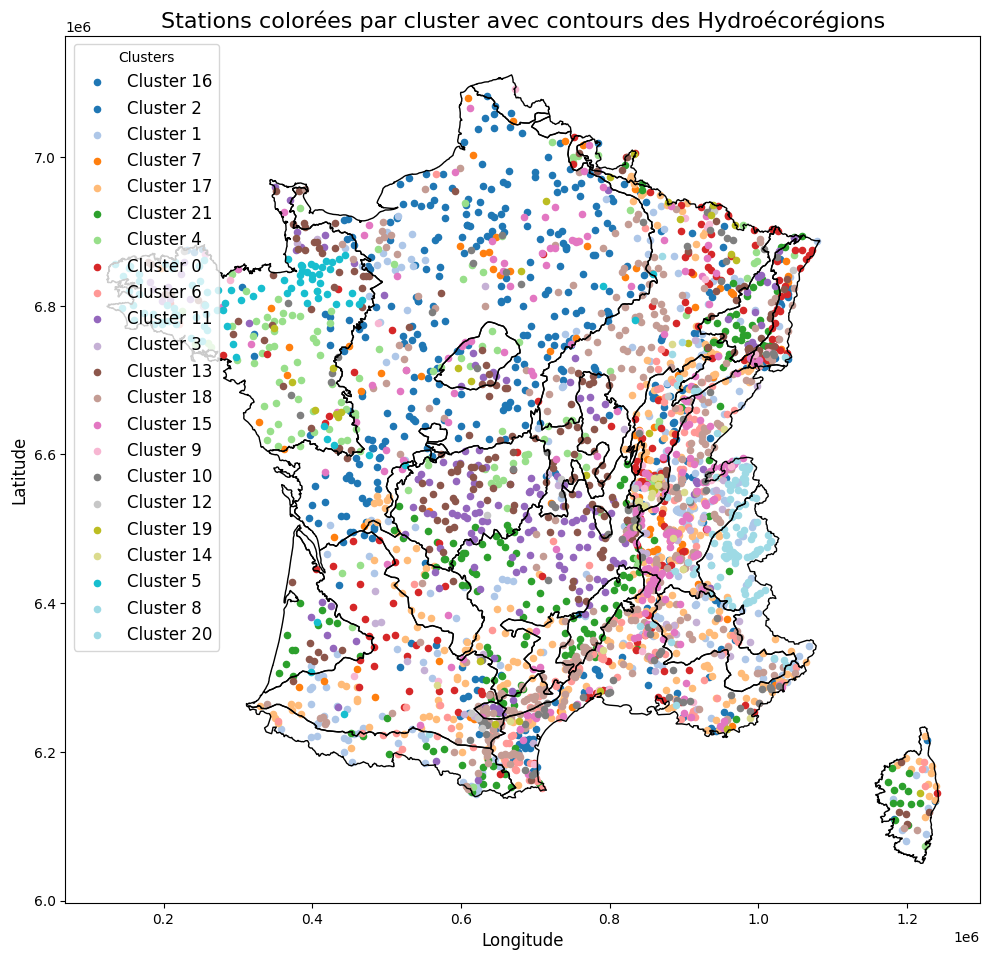

In [194]:


# Projection Lambert 93
crs_lambert = 'PROJCS["RGF_1993_Lambert_93",GEOGCS["GCS_RGF_1993",DATUM["D_RGF_1993",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic"],PARAMETER["False_Easting",700000.0],PARAMETER["False_Northing",6600000.0],PARAMETER["Central_Meridian",3.0],PARAMETER["Standard_Parallel_1",49.0],PARAMETER["Standard_Parallel_2",44.0],PARAMETER["Latitude_Of_Origin",46.5],UNIT["Meter",1.0]]'

x_col = 'CoordXStationMesureEauxSurface'
y_col = 'CoordYStationMesureEauxSurface'
cluster_col = 'cluster'  # Colonne contenant l'information sur les clusters

# Cr√©er un GeoDataFrame pour les stations avec des points en Lambert 93
carto_i2m2 = gpd.GeoDataFrame(
    df_results_coord,
    crs=crs_lambert,
    geometry=gpd.GeoSeries(df_results_coord.apply(lambda x: geom.Point(x[x_col], x[y_col]), axis=1))
)

# Charger les hydro√©cor√©gions et les convertir en Lambert 93
HER_lambert = df_hydroregions.to_crs(crs_lambert)

# Pr√©parer les couleurs pour les clusters
unique_clusters = carto_i2m2[cluster_col].unique()
cmap = cm.get_cmap('tab20', len(unique_clusters))  # Palette de couleurs
cluster_colors = {cluster: cmap(i) for i, cluster in enumerate(unique_clusters)}

# Pr√©parer la figure
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Tracer uniquement les contours des hydro√©cor√©gions
HER_lambert.boundary.plot(ax=ax, color='black', linewidth=1)

# Tracer les stations color√©es par cluster
for cluster, color in cluster_colors.items():
    cluster_data = carto_i2m2[carto_i2m2[cluster_col] == cluster]
    cluster_data.plot(ax=ax, color=color, markersize=20, label=f"Cluster {cluster}")

# Ajouter une l√©gende
ax.legend(loc='upper left', fontsize='large', title='Clusters')

# Ajouter un titre et des labels
plt.title('Stations color√©es par cluster avec contours des Hydro√©cor√©gions', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()


In [547]:
# TODO : interpr√©ter les clusters

In [548]:


# ensuite refaire avec moyenne, puis autre d√©calage (genre juste copier, coller, peut etre cr√©er des fonctions, on voit qui ressemble le plus...)

TODO : on essaye d'autres m√©thodes pour trouver le nombre de clusters

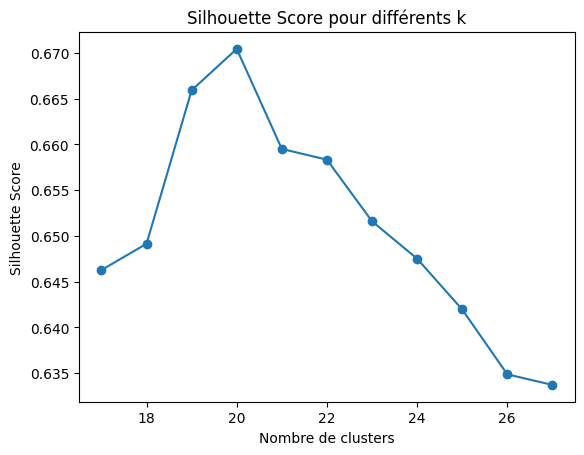

In [549]:


df_results_2 = df_pc_median_bio_median_1_month.copy()

sil_scores = []
for k in range(nb_hydroecoregions - 5, nb_hydroecoregions + 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df_results_2['cluster'] = kmeans.fit_predict(df_pc_median_bio_median_1_month)
    sil_score = silhouette_score(df_pc_median_bio_median_1_month, df_results_2['cluster'])
    sil_scores.append(sil_score)

plt.plot(range(nb_hydroecoregions - 5, nb_hydroecoregions + 6), sil_scores, marker='o')
plt.title('Silhouette Score pour diff√©rents k')
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette Score')
plt.show()


## TODO : revoir √ßa

In [550]:
# TODO : afficher les clusters sur la carte
# TODO puis afficher quels attrbiuts

In [551]:
# TODO ZOE : traitements des donn√©es manquantes ?

# K-Means Clustering

# DTW ?

## Visualisation des clusters

In [552]:


n_components = # TODO ZOE combien d'hydroecroegions

SyntaxError: invalid syntax (259917344.py, line 1)

In [ ]:
# TODO CHARLOTTE : si pas de donn√©es pour toutes les hydroecoregions re clustering
# avec le nombre d'hydroecoregions repr√©sent√©es

# Conclusion

## TODO

rappel de tout ce qu'on a fait

rappel



- Nous pouvons voir que les saisons influencent clairement l'indice biologique I2M2, avec une qualit√© biologique g√©n√©ralement plus favorable en √©t√© et en automne. Ce r√©sultat pourrait √™tre li√© √† des variations naturelles des conditions environnementales ou √† des variations des activit√©s humaines influen√ßant la qualit√© de l'eau. Ces observations m√©riteraient d'√™tre approfondies pour mieux comprendre les causes sous-jacentes


-
# TODO (done) ZOE : on peut essayer atre combianaison : 
# moyenne / m√©diance
# diff√©rents lags au lieu de df_pc_bio_median_lag_1 (pas le vrai nom √† rev√©rifier)

- diminution significatif du nombre de stations par hydror√©gion et meme en g√©n√©ral apr√®s le merge